# __Analysis of FinCrime files__

> This notebook contains all the code work performed on the two datasets from ICIJ. There were two: 'bank connections' and 'transactions_map'. Although the original files contained about 2100 SARs from 1999 to 2017 that were flagged by financial institutions as possible money laundering or other criminal activity. ICIJ identified about $2 trillion dollars worth of transactions.

> ICIJ did not publish the raw data and chose to release only a portion in the public interest. For more info on the full report, please click on this [link.]('https://www.icij.org/investigations/fincen-files/download-fincen-files-transaction-data/')

> The datasets used in this notebook only have information on transactions between 2000 to 2017. Therefore, the numbers shown here will vary to the numbers on the actual ICIJ report. The names of the variables are unchanged.

In [70]:
#import all necessary libraries required for the data analysis
import pandas as pd
from zipfile import ZipFile
from urllib.request import urlopen
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sb
import numpy as np
#!conda install ipython-sql
#!conda install -c conda-forge psycopg2
from sqlalchemy import create_engine
import sqlalchemy
#!pip install plotnine
from plotnine import *
#!pip install beautifulsoup4
#!conda install plotly
import plotly.express as px
import plotly.graph_objects as go

##### Files are read programmically as CSV files. This is to prepare for a database creation.

In [109]:
URL = 'https://media.icij.org/uploads/2020/09/download_data_fincen_files.zip'
z = urlopen(URL)
myzip = ZipFile(BytesIO(z.read())).extract('download_transactions_map.csv')
transaction = pd.read_csv(myzip)

In [110]:
z = urlopen(URL)
myzip = ZipFile(BytesIO(z.read())).extract('download_bank_connections.csv')
bank = pd.read_csv(myzip)

##### Create an SQL Database using create_engine and tables using 'to_sql'. The tables are renamed for clarity.

In [88]:
#To create a database and tables for further analysis
con = create_engine('sqlite:///FinCrime_Files.db').connect()
bank.to_sql(name='bank_connections', if_exists = 'replace', con = con, index = False)
transaction.to_sql(name='transaction_map', if_exists = 'replace', con=con, index = False)

In [89]:
# to connect to the database
engine = sqlalchemy.create_engine('sqlite:///FinCrime_Files.db')
%reload_ext sql
%sql sqlite:///FinCrime_Files.db

'Connected: @FinCrime_Files.db'

# __Explainatory Data Analysis__

### _Bank connections dataset_

The table 'bank connections' below shows that there are ___5498___ observations(rows) and ___7___ variables(columns). The variables indications are as follow:  
>__icij_sar_id__ = SAR ID number generated by ICIJ that shows all the connections that were extracted from the same report.   
>__filer_org_name_id__ = financial institution that filed the report with FinCEN  
>__filer_org_name__ = financial institution that filed the report with FinCEN  
>__entity_b_id__ = financial institution that received correspondent services from bank based in the US  
>__entity_b__ = financial institution that received correspondent services from bank based in the US  
>__entity_b_country__ = location country of the financial institution that received correspondent services  
>__entity_b_iso_code__ = ISO code of the location country of the financial institution that received correspondent services  

##### The dimension of the dataset 'Bank Connections'

In [104]:
print("The number of columns and rows for 'bank_connections' is {} and {}, respectively.".format(bank.shape[1], bank.shape[0]))

The number of columns and rows for 'bank_connections' is 7 and 5498, respectively.


##### SQLite

In [105]:
%sql SELECT * FROM bank_connections limit 3

 * sqlite:///FinCrime_Files.db
Done.


[(4132, 'standard-chartered-plc', 'Standard Chartered Plc', 'habib-metropolitan-bank-limited-karachi-pakistan-pak', 'Habib Metropolitan Bank Limited', 'Pakistan', 'PAK'),
 (3181, 'standard-chartered-plc', 'Standard Chartered Plc', 'standard-chartered-bank-dubai-uae-are', 'Standard Chartered Bank', 'United Arab Emirates', 'ARE'),
 (3181, 'standard-chartered-plc', 'Standard Chartered Plc', 'al-rostamani-international-exchange-uae-are', 'Al Rostamani International Exchange', 'United Arab Emirates', 'ARE')]

### _Transaction_map dataset_

The table 'transaction_map' below shows that there are ___4507___ observations(rows) and ___16___ variables(columns). The variables indications are as follow:
>__Id__ = transaction identification number generated by ICIJ  
>__icij_sar_id__ = SAR ID number generated by ICIJ that shows all the transactions that were extracted from the same report.   
>__filer_org_name_id__ = financial institution that filed the report with FinCEN  
>__filer_org_name__ = financial institution that filed the report with FinCEN  
>__begin_date__ = date the first transaction in the reported transaction by the filer (set of transactions with same originator and beneficiary) took place  
>__end_date__ = date the last transaction in the reported transaction by the filer (set of transactions with same originator and beneficiary) took place  
>__originator_bank_id__ = bank where the transaction (s) was originated  
>__originator_bank__ = bank where the transaction (s) was originated  
>__originator_bank_country__ = location country of the originator bank  
>__originator_iso__ = originator bank ISO code of the bank location country  
>__beneficiary_bank_id__ = bank where the transaction (s) was received  
>__beneficiary_bank__ = bank where the transaction (s) was received  
>__beneficiary_bank_country__ = location country of the beneficiary bank  
>__beneficiary_iso__ = beneficiary bank ISO code of the bank location country  
>__number_transactions__ = number of transactions  
>__amount_transactions__ = total amount of the transactions  

##### The dimension of the dataset 'Transactions'

In [106]:
print("The number of columns and rows for 'transaction_map' is {} and {}, respectively.".format(transaction.shape[1], transaction.shape[0]))

The number of columns and rows for 'transaction_map' is 16 and 4507, respectively.


##### SQLite

In [107]:
%sql SELECT * FROM transaction_map limit 3

 * sqlite:///FinCrime_Files.db
Done.


[(223254, 3297, 'the-bank-of-new-york-mellon-corp', 'The Bank of New York Mellon Corp.', '2015-03-25', '2015-09-25', 'cimb-bank-berhad', 'CIMB Bank Berhad', 'Singapore', 'SGP', 'barclays-bank-plc-london-england-gbr', 'Barclays Bank Plc', 'United Kingdom', 'GBR', 68.0, 56900000.0),
 (223255, 3297, 'the-bank-of-new-york-mellon-corp', 'The Bank of New York Mellon Corp.', '2015-03-30', '2015-09-25', 'cimb-bank-berhad', 'CIMB Bank Berhad', 'Singapore', 'SGP', 'barclays-bank-plc-london-england-gbr', 'Barclays Bank Plc', 'United Kingdom', 'GBR', 118.0, 116000000.0),
 (223258, 2924, 'the-bank-of-new-york-mellon-corp', 'The Bank of New York Mellon Corp.', '2012-07-05', '2012-07-05', 'barclays-bank-plc-ho-uk', 'Barclays Bank Plc Ho UK', 'United Kingdom', 'GBR', 'skandinaviska-enskilda-banken-stockholm-sweden-swe', 'Skandinaviska Enskilda Banken', 'Sweden', 'SWE', None, 5000.0)]

In [111]:
bank.describe(percentiles = [0.25,0.5,0.75,0.9])

icij_sar_id
count  5498.000000
mean   3308.730084
std     653.180011
min    2208.000000
25%    2665.250000
50%    3431.500000
75%    3859.000000
90%    4194.000000
max    4413.000000

In [109]:
transaction.describe(percentiles = [0.25,0.5,0.75,0.9])

id  icij_sar_id  number_transactions  amount_transactions
count    4507.000000  4507.000000          4396.000000         4.507000e+03
mean   233598.417351  3046.542933             4.129436         7.916414e+06
std      5836.150684   645.354556             9.892107         5.311290e+07
min    223254.000000  2208.000000             1.000000         1.180000e+00
25%    228068.500000  2441.000000             1.000000         6.704167e+04
50%    234944.000000  2905.000000             1.000000         4.950000e+05
75%    238380.000000  3461.000000             3.000000         2.813811e+06
90%    240345.400000  4121.000000             9.000000         1.151360e+07
max    243960.000000  4411.000000           174.000000         2.721000e+09

In [186]:
transaction.isna().sum().sum() #these rows have no information as indicated in the SARs

123

In [113]:
%sql SELECT count(DISTINCT originator_bank_country) FROM transaction_map #to find out the total number of countries

 * sqlite:///FinCrime_Files.db
Done.


[(119,)]

## Data Visualisation

##### Who are filers?

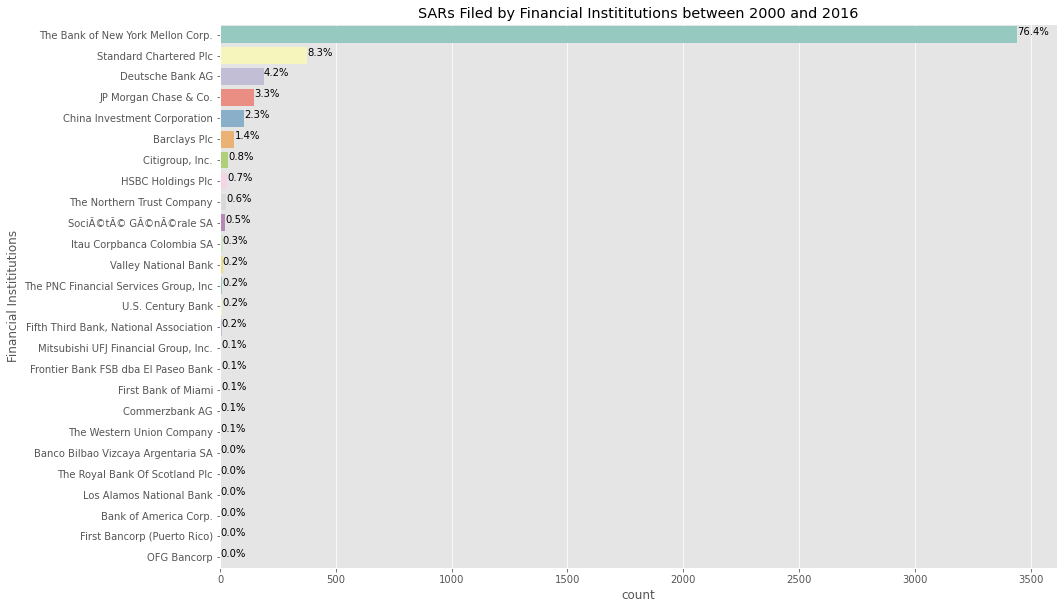

In [200]:
f, ax = plt.subplots(figsize=(15, 10))
sb.countplot(y=transaction.filer_org_name, order = transaction.filer_org_name.value_counts().index, palette = 'Set3');
ax.set_title('SARs Filed by Financial Instititutions between 2000 and 2016');
ax.set(ylabel='Financial Instititutions')

total = len(transaction['filer_org_name'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

### Countries from which transactions originate

> The chart below shows the total number of times each country was named in SARs as from which transaction originated. There are 119 countries that were named in this dataset. We have 194 recognised countries at the time of this writing.

##### Total count of countries that appeared as originators in the SARs

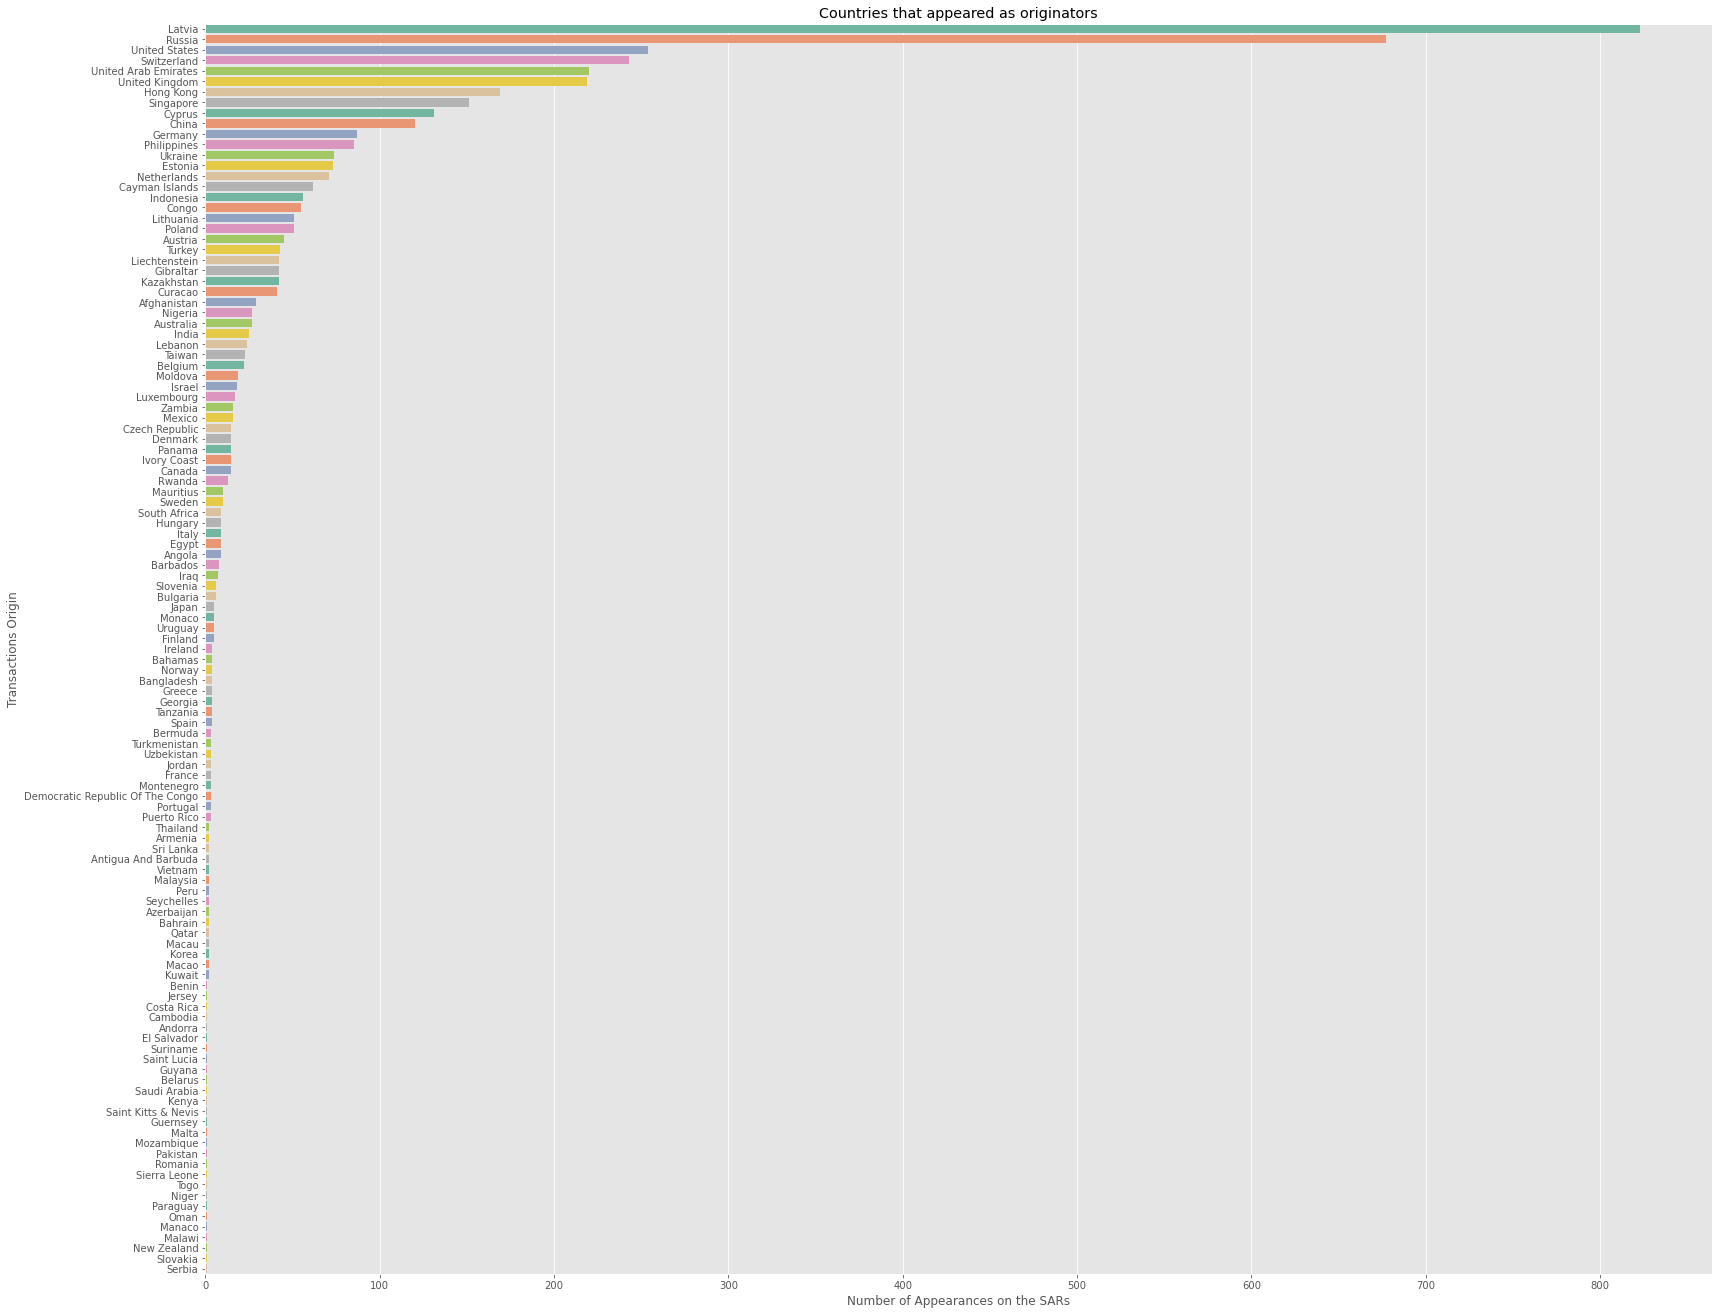

In [112]:
f, ax = plt.subplots(figsize=(27, 23))
sb.countplot(y=transaction.originator_bank_country, order = transaction.originator_bank_country.value_counts().index, palette="Set2");
ax.set(xlabel='Number of Appearances on the SARs', ylabel='Transactions Origin');
ax.set_title('Countries that appeared as originators')
plt.show()

##### Top 20 countries with the highest number of times named as <ins>transactions originators</ins> in this dataset. 

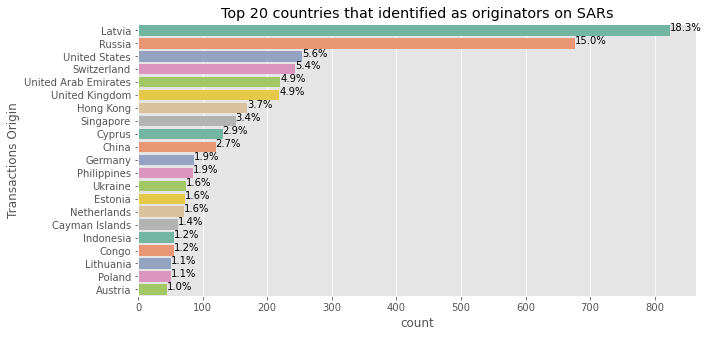

In [201]:
f, ax = plt.subplots(figsize=(10,5))
sb.countplot(y=transaction.originator_bank_country, order = transaction.originator_bank_country.value_counts().index[0:21], palette="Set2");
ax.set(ylabel='Transactions Origin')
ax.set_title('Top 20 countries that identified as originators on SARs')

total = len(transaction['originator_bank_country'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

### Countries that received transactions

##### The chart below shows the total number of times each country was named in SARs as the beneficiaries.

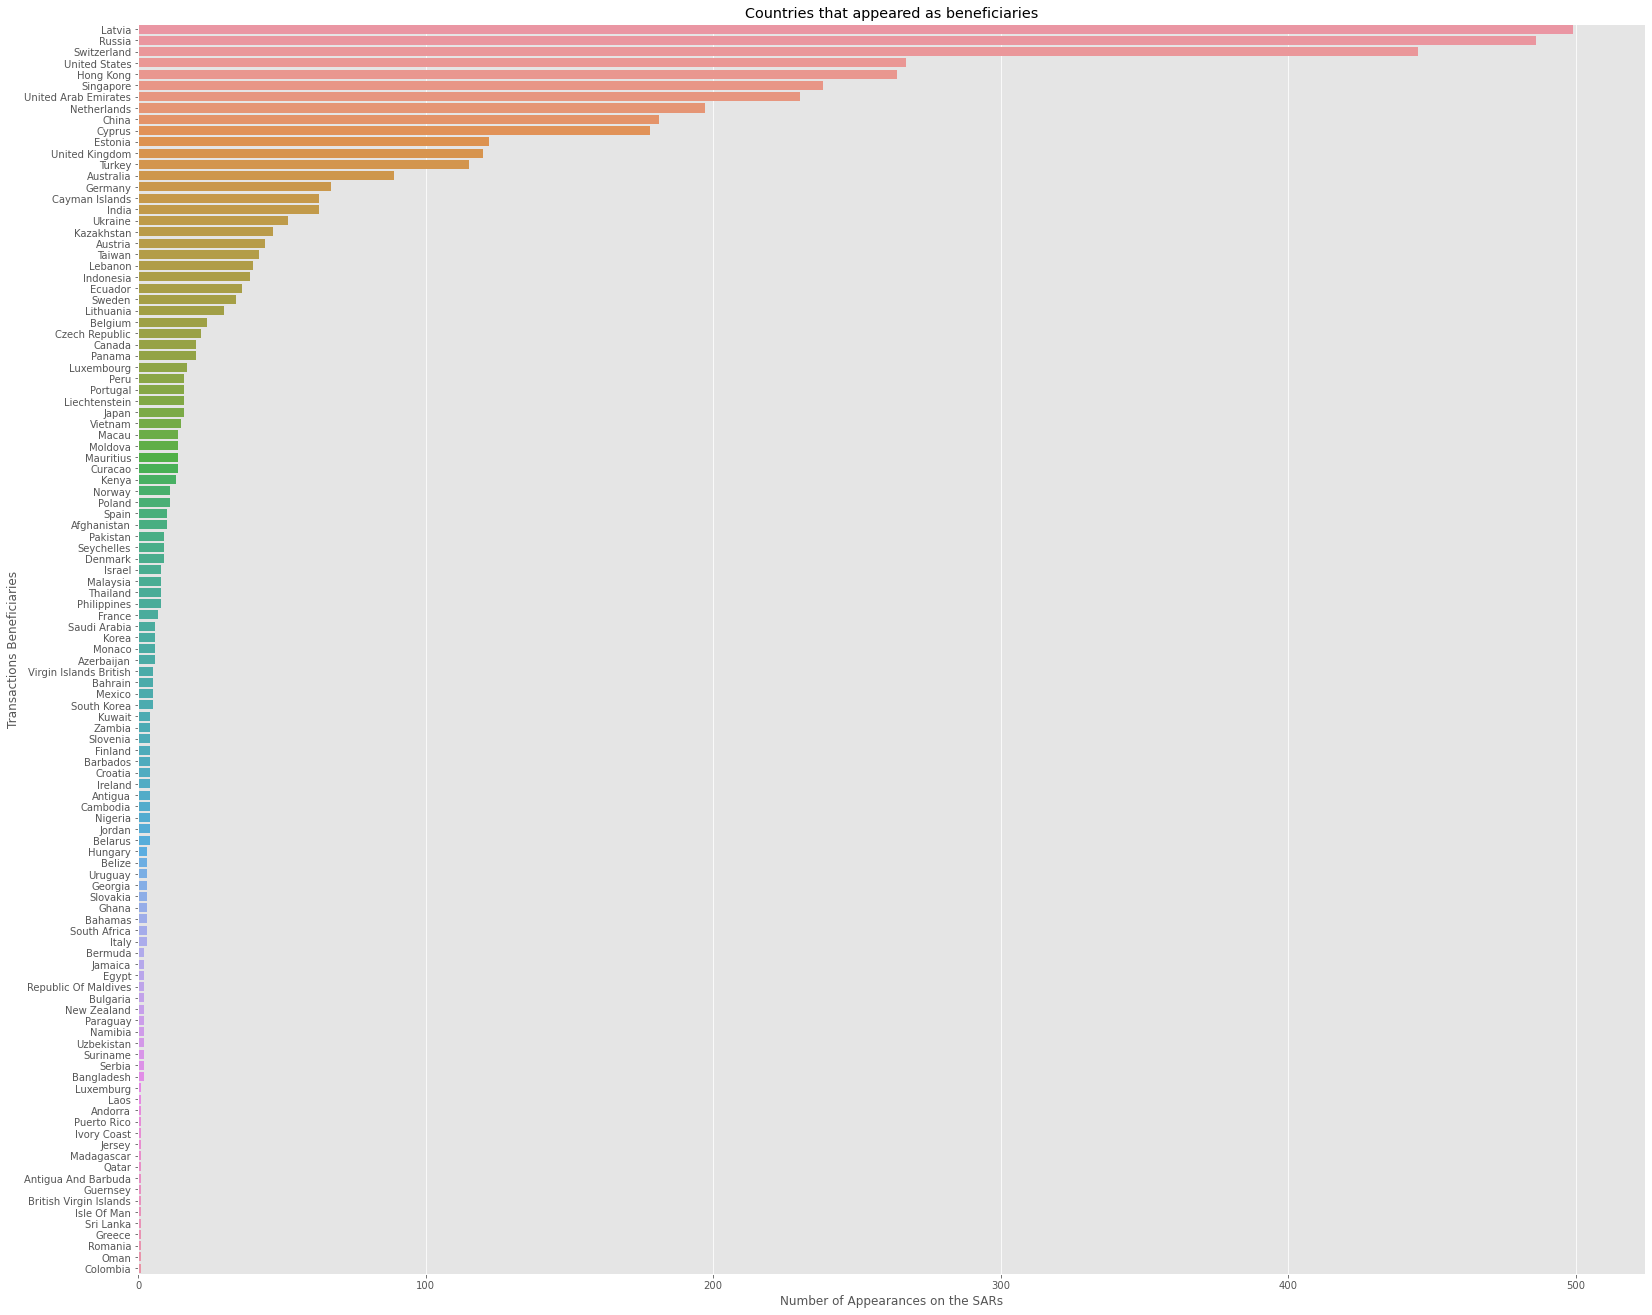

In [115]:
f, ax = plt.subplots(figsize=(27, 23))
sb.countplot(y=transaction.beneficiary_bank_country, order = transaction.beneficiary_bank_country.value_counts().index);
ax.set(xlabel='Number of Appearances on the SARs', ylabel='Transactions Beneficiaries')
ax.set_title('Countries that appeared as beneficiaries')
plt.show()

##### Top 20 countries with the highest number of times named as <ins>beneficiaries</ins> in this dataset. 

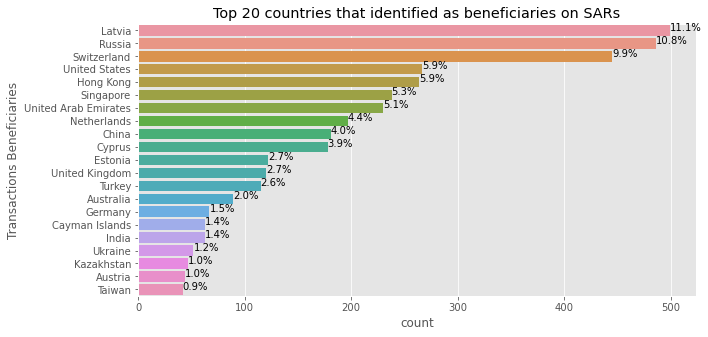

In [202]:
f, ax = plt.subplots(figsize=(10, 5))
sb.countplot(y=transaction.beneficiary_bank_country, order = transaction.beneficiary_bank_country.value_counts().index[0:21]);
ax.set(ylabel='Transactions Beneficiaries')
ax.set_title('Top 20 countries that identified as beneficiaries on SARs')

total = len(transaction['beneficiary_bank_country'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

### To breakdown the transactions based these conditions:
> **Top Originator** = Total amount of money that left countries (originators) named the most in the SARs.  
> **Top Amount** = The highest amount of transactions that had left the banks in these countries.  
> **Top Beneficiary** = Total amount of money that left for the countries (beneficiaries) that were named the most in the SARs.

##### TOP 5 ORIGINATORS

In [14]:
%%sql 
SELECT originator_bank_country, COUNT(originator_bank_country), SUM(number_transactions), 
SUM(amount_transactions) AS total_amount
FROM transaction_map
GROUP BY originator_bank_country
ORDER BY COUNT(originator_bank_country) DESC
LIMIT 5

 * sqlite:///FinCrime_Files.db
Done.


[('Latvia', 823, 2256.0, 6437229703.870004),
 ('Russia', 677, 2760.0, 3502306533.1499968),
 ('United States', 254, 1194.0, 1188987125.77),
 ('Switzerland', 243, 759.0, 4182906092.18),
 ('United Arab Emirates', 220, 973.0, 256800723.89000005)]

##### SQL - Date transactions

In [17]:
%sql SELECT begin_date, end_date, originator_bank_country FROM transaction_map WHERE originator_bank_country = 'Latvia' ORDER BY begin_date

 * sqlite:///FinCrime_Files.db
Done.


[(None, None, 'Latvia'),
 ('2004-03-15', '2004-06-04', 'Latvia'),
 ('2004-05-21', '2004-05-21', 'Latvia'),
 ('2007-01-23', '2007-10-18', 'Latvia'),
 ('2007-05-21', '2008-02-21', 'Latvia'),
 ('2007-06-22', '2008-12-09', 'Latvia'),
 ('2007-08-17', '2008-12-12', 'Latvia'),
 ('2007-10-26', '2009-02-03', 'Latvia'),
 ('2007-11-13', '2008-07-29', 'Latvia'),
 ('2007-12-13', '2007-12-18', 'Latvia'),
 ('2008-02-01', '2008-05-08', 'Latvia'),
 ('2008-02-06', '2008-03-12', 'Latvia'),
 ('2008-05-14', '2008-12-10', 'Latvia'),
 ('2008-07-22', '2008-07-22', 'Latvia'),
 ('2009-01-12', '2009-01-12', 'Latvia'),
 ('2009-01-12', '2009-01-12', 'Latvia'),
 ('2009-01-12', '2009-01-12', 'Latvia'),
 ('2009-01-12', '2009-01-12', 'Latvia'),
 ('2009-01-12', '2009-01-12', 'Latvia'),
 ('2009-01-12', '2009-01-12', 'Latvia'),
 ('2009-01-12', '2009-01-12', 'Latvia'),
 ('2009-01-12', '2009-01-12', 'Latvia'),
 ('2009-01-12', '2009-01-12', 'Latvia'),
 ('2009-01-12', '2009-01-12', 'Latvia'),
 ('2009-01-12', '2009-01-12', 'Latvia'),
 ('2009-01-12', '2009-01-12', 'Latvia'),
 ('2009-01-12', '2009-01-12', 'Latvia'),
 ('2009-01-12', '2009-01-12', 'Latvia'),
 ('2009-01-12', '2009-01-12', 'Latvia'),
 ('2009-01-13', '2009-01-15', 'Latvia'),
 ('2009-01-13', '2009-01-13', 'Latvia'),
 ('2009-01-13', '2009-01-13', 'Latvia'),
 ('2009-01-13', '2009-01-13', 'Latvia'),
 ('2009-01-13', '2009-01-13', 'Latvia'),
 ('2009-01-13', '2009-01-13', 'Latvia'),
 ('2009-01-13', '2009-01-13', 'Latvia'),
 ('2009-01-13', '2009-01-13', 'Latvia'),
 ('2009-01-13', '2009-01-13', 'Latvia'),
 ('2009-01-13', '2009-01-13', 'Latvia'),
 ('2009-01-13', '2009-01-13', 'Latvia'),
 ('2009-01-14', '2009-01-14', 'Latvia'),
 ('2009-01-14', '2009-01-14', 'Latvia'),
 ('2009-01-14', '2009-01-14', 'Latvia'),
 ('2009-01-14', '2009-01-14', 'Latvia'),
 ('2009-01-15', '2009-01-15', 'Latvia'),
 ('2009-01-15', '2009-01-15', 'Latvia'),
 ('2009-01-15', '2009-01-15', 'Latvia'),
 ('2009-01-15', '2009-01-15', 'Latvia'),
 ('2009-01-15', '2009-01-15', 'Latvia'),
 ('2009-01-15', '2009-01-15', 'Latvia'),
 ('2009-01-15', '2009-01-15', 'Latvia'),
 ('2009-01-15', '2009-01-15', 'Latvia'),
 ('2009-01-15', '2009-01-15', 'Latvia'),
 ('2009-01-15', '2009-01-15', 'Latvia'),
 ('2009-01-16', '2009-01-16', 'Latvia'),
 ('2009-01-16', '2009-01-16', 'Latvia'),
 ('2009-01-16', '2009-01-16', 'Latvia'),
 ('2009-01-16', '2009-01-16', 'Latvia'),
 ('2009-01-16', '2009-01-16', 'Latvia'),
 ('2009-01-16', '2009-01-16', 'Latvia'),
 ('2009-01-16', '2009-01-16', 'Latvia'),
 ('2009-01-16', '2009-01-16', 'Latvia'),
 ('2009-01-20', '2009-01-20', 'Latvia'),
 ('2009-01-21', '2009-01-21', 'Latvia'),
 ('2009-01-22', '2009-01-22', 'Latvia'),
 ('2009-01-23', '2009-01-23', 'Latvia'),
 ('2009-01-28', '2009-01-28', 'Latvia'),
 ('2009-01-30', '2009-01-30', 'Latvia'),
 ('2009-06-03', '2009-06-03', 'Latvia'),
 ('2009-06-03', '2009-06-03', 'Latvia'),
 ('2009-06-04', '2009-06-04', 'Latvia'),
 ('2009-06-05', '2009-06-05', 'Latvia'),
 ('2009-06-05', '2009-06-05', 'Latvia'),
 ('2009-06-05', '2009-06-05', 'Latvia'),
 ('2009-06-05', '2009-06-05', 'Latvia'),
 ('2009-06-09', '2009-06-09', 'Latvia'),
 ('2009-06-09', '2009-06-09', 'Latvia'),
 ('2009-06-09', '2009-06-09', 'Latvia'),
 ('2009-06-10', '2009-06-10', 'Latvia'),
 ('2009-06-10', '2009-06-10', 'Latvia'),
 ('2009-06-11', '2009-06-11', 'Latvia'),
 ('2009-06-11', '2009-06-11', 'Latvia'),
 ('2009-06-16', '2009-06-16', 'Latvia'),
 ('2009-06-17', '2009-06-17', 'Latvia'),
 ('2009-06-18', '2009-06-18', 'Latvia'),
 ('2009-06-18', '2009-06-18', 'Latvia'),
 ('2009-06-18', '2009-06-18', 'Latvia'),
 ('2009-06-19', '2009-06-19', 'Latvia'),
 ('2009-06-22', '2009-06-22', 'Latvia'),
 ('2009-06-23', '2009-06-23', 'Latvia'),
 ('2009-06-23', '2009-06-23', 'Latvia'),
 ('2009-06-25', '2009-06-25', 'Latvia'),
 ('2009-06-26', '2009-06-26', 'Latvia'),
 ('2009-06-26', '2009-06-26', 'Latvia'),
 ('2009-07-01', '2009-07-01', 'Latvia'),
 ('2009-07-02', '2009-07-02', 'Latvia'),
 ('2009-07-02', '2009-07-02', 'Latvia'),
 ('2009-07-03', '2009-07-03', 'Latvia')

In [15]:
top_originator=_.DataFrame()

##### TOP AMOUNT

In [75]:
%%sql 
SELECT originator_bank_country, number_transactions, amount_transactions AS total_amount
FROM transaction_map
ORDER BY amount_transactions DESC
LIMIT 5

 * sqlite:///FinCrime_Files.db
Done.


[('Netherlands', 1.0, 2721000000.0),
 ('United Kingdom', 90.0, 1080000000.0),
 ('Switzerland', 18.0, 803000000.0),
 ('Belgium', 1.0, 512000000.0),
 ('Luxembourg', 1.0, 500000000.0)]

In [76]:
top_amount=_.DataFrame()
top_amount.head(2)

originator_bank_country  number_transactions  total_amount
0             Netherlands                  1.0  2.721000e+09
1          United Kingdom                 90.0  1.080000e+09

##### TOP 5 BENEFICIARIES

In [11]:
%%sql 
SELECT begin_date, end_date, originator_bank_country, beneficiary_bank_country, COUNT(beneficiary_bank_country), SUM(number_transactions), 
SUM(amount_transactions) AS total_amount
FROM transaction_map
GROUP BY beneficiary_bank_country
ORDER BY COUNT(beneficiary_bank_country) DESC
LIMIT 5

 * sqlite:///FinCrime_Files.db
Done.


[('2010-12-07', '2010-12-14', 'Russia', 'Latvia', 499, 1959.0, 3950207765.879998),
 ('2011-02-10', '2011-02-10', 'Latvia', 'Russia', 486, 1239.0, 7279835890.6),
 ('2014-02-07', '2014-02-11', 'Mauritius', 'Switzerland', 445, 1417.0, 3744610080.7099986),
 ('2010-12-07', '2010-12-23', 'Latvia', 'United States', 267, 1345.0, 1824598235.5100002),
 ('2014-04-03', '2014-04-27', 'United Arab Emirates', 'Hong Kong', 264, 1821.0, 2656550002.100001)]

In [12]:
top_beneficiary=_.DataFrame()

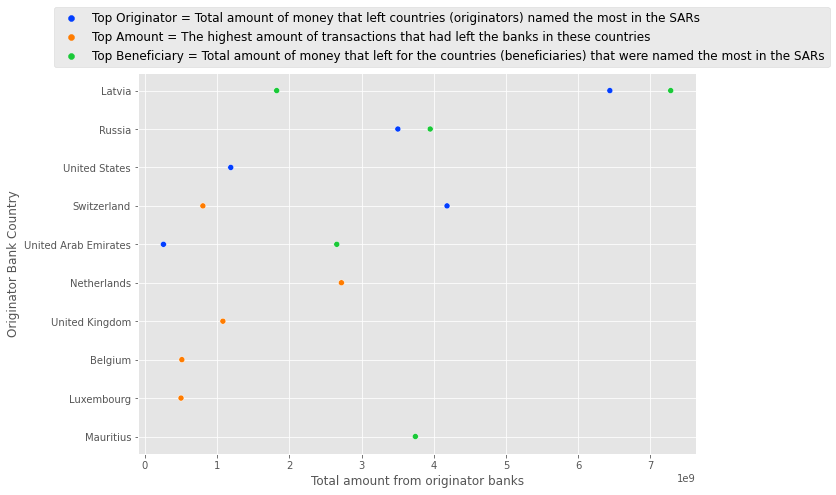

In [209]:
label1='Top Originator = Total amount of money that left countries (originators) named the most in the SARs'
label2='Top Amount = The highest amount of transactions that had left the banks in these countries'
label3='Top Beneficiary = Total amount of money that left for the countries (beneficiaries) that were named the most in the SARs'

concatenated = pd.concat([top_originator.assign(dataset=label1), top_amount.assign(dataset=label2), top_beneficiary.assign(dataset=label3)])
f, ax = plt.subplots(figsize = (10,7))
sb.scatterplot(x= 'total_amount', y= 'originator_bank_country', data = concatenated, hue='dataset', palette='bright');
ax.set(xlabel='Total amount from originator banks', ylabel='Originator Bank Country');
ax.legend(loc='lower right', bbox_to_anchor=(1.25, 1), fontsize='large');

### Distribution of data:

In [211]:
amount = %sql SELECT number_transactions, amount_transactions FROM transaction_map
amount = amount.DataFrame()

 * sqlite:///FinCrime_Files.db
Done.


##### Number of Transactions (log10)

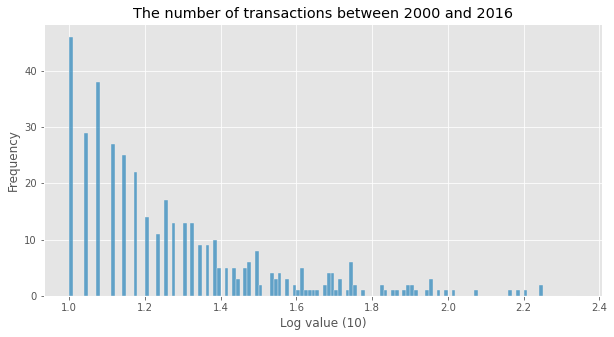

In [212]:
f, ax = plt.subplots(figsize=(10, 5))
log_data2= np.log10(amount['number_transactions'])
bin_range = np.arange(1, log_data2.max()+0.1, 0.01)
sb.histplot(log_data2, bins = bin_range)
ax.set(xlabel='Log value (10)', ylabel='Frequency')
ax.set_title('The number of transactions between 2000 and 2016')
plt.show()

##### The Distribution of Dollars (log10)

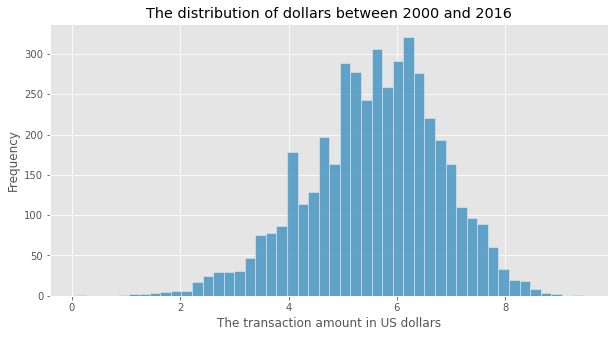

In [214]:
f, ax = plt.subplots(figsize=(10, 5))
log_data = np.log10(amount['amount_transactions'])
sb.histplot(log_data);
ax.set(xlabel='The transaction amount in US dollars', ylabel='Frequency')
ax.set_title('The distribution of dollars between 2000 and 2016')  
    
plt.show()

##### The Breakdown of the transaction data

In [120]:
transaction[['number_transactions', 'amount_transactions']].describe(percentiles = [0.25,.5,.75,.9])

number_transactions  amount_transactions
count          4396.000000         4.507000e+03
mean              4.129436         7.916414e+06
std               9.892107         5.311290e+07
min               1.000000         1.180000e+00
25%               1.000000         6.704167e+04
50%               1.000000         4.950000e+05
75%               3.000000         2.813811e+06
90%               9.000000         1.151360e+07
max             174.000000         2.721000e+09

### One-filer

In [121]:
%%sql
SELECT filer_org_name, begin_date, end_date, number_transactions, amount_transactions,
originator_bank, beneficiary_bank
FROM transaction_map 
GROUP BY filer_org_name
HAVING COUNT(filer_org_name) < 5

 * sqlite:///FinCrime_Files.db
Done.


[('Banco Bilbao Vizcaya Argentaria SA', '2014-11-14', '2014-11-14', 1.0, 290511.35, 'Primtercombank', 'Bbva Paraguay, S.A.'),
 ('Bank of America Corp.', '2014-08-14', '2014-08-14', 1.0, 45700000.0, 'ING Bank NV', 'Deutsche Bank AG'),
 ('Commerzbank AG', '2011-04-08', '2011-07-01', 2.0, 450000.0, 'Bank Snoras', 'Bank Soyuz'),
 ('First Bancorp (Puerto Rico)', '2016-01-01', '2017-02-28', 1.0, 25000.0, 'Firstbank Puerto Rico', 'Firstbank Puerto Rico,'),
 ('First Bank of Miami', '2012-03-20', '2012-03-20', None, 4662.0, 'First Bank of Miami', 'Citicorp '),
 ('Frontier Bank FSB dba El Paseo Bank', '2012-05-30', '2012-05-30', 1.0, 4000.0, 'Frontier Bank Fsb Dba El Paseo Bank', 'First National Bank of Omaha'),
 ('Los Alamos National Bank', '2014-06-05', '2014-06-05', 1.0, 10000.0, 'Los Alamos National Bank', 'Los Alamos National Bank'),
 ('Mitsubishi UFJ Financial Group, Inc.', '2013-11-07', '2013-11-07', 1.0, 270420.0, 'Bank of Tokyo-Mitsubishi Ufj, Ltd.  Chicago Branch', 'Rietumu Banka'),
 ('OFG Bancorp', '2015-05-26', '2015-05-26', 1.0, 167000.0, 'Deutsche Bank AG Taunusanlage 12 ', 'Oriental Bank'),
 ('The Royal Bank Of Scotland Plc', '2014-07-29', '2014-07-29', 1.0, 13100000.0, 'Royal Bank of Scotland', 'ABN Amro'),
 ('The Western Union Company', '2002-12-11', '2002-12-11', 1.0, 3134.0, 'Ukranian Post International', 'Belvnesheconombank')]

### Total amount of transactions

In [122]:
%%sql 
SELECT SUM(amount_transactions)
FROM transaction_map

 * sqlite:///FinCrime_Files.db
Done.


[(35679276293.14004,)]

##### More than the Median

In [123]:
%%sql 
SELECT amount_transactions, number_transactions
FROM transaction_map GROUP BY amount_transactions 
HAVING amount_transactions >= 
(SELECT amount_transactions FROM transaction_map ORDER BY amount_transactions LIMIT 1 OFFSET (SELECT COUNT(*) FROM transaction_map) / 2)

 * sqlite:///FinCrime_Files.db
Done.


[(495000.0, 1.0),
 (495360.0, 1.0),
 (496000.0, 1.0),
 (496270.2, 2.0),
 (497850.0, 10.0),
 (497985.0, 1.0),
 (498000.0, 3.0),
 (498100.0, 1.0),
 (498985.0, 1.0),
 (499048.76, 3.0),
 (499905.0, 1.0),
 (499948.0, 1.0),
 (499966.0, 1.0),
 (499974.0, 1.0),
 (499975.0, 1.0),
 (499980.0, 1.0),
 (499990.12, 2.0),
 (499998.45, 22.0),
 (500000.0, 1.0),
 (500001.0, 1.0),
 (500950.0, 1.0),
 (501500.0, 1.0),
 (501900.0, 1.0),
 (502000.0, 1.0),
 (502250.0, 1.0),
 (503642.63, 30.0),
 (503808.82, 3.0),
 (504494.3, 8.0),
 (505000.0, 1.0),
 (510000.0, 1.0),
 (511182.0, 1.0),
 (511560.0, 1.0),
 (511605.25, 2.0),
 (511605.94, 18.0),
 (512987.74, 3.0),
 (514929.0, 1.0),
 (515000.0, 1.0),
 (517500.0, 9.0),
 (518670.0, 2.0),
 (518987.0, 2.0),
 (520000.0, 3.0),
 (520528.6, 4.0),
 (524536.33, 1.0),
 (525000.0, 1.0),
 (526038.93, 1.0),
 (528392.77, 3.0),
 (528410.0, 1.0),
 (530000.0, 2.0),
 (531159.9, 1.0),
 (531540.37, 10.0),
 (532000.0, 1.0),
 (532600.0, 1.0),
 (533541.0, 3.0),
 (534948.0, 4.0),
 (536792.25, 1.0),
 (537665.73, 3.0),
 (538701.59, 7.0),
 (540000.0, 1.0),
 (541600.43, 1.0),
 (542699.0, 1.0),
 (542717.4, 10.0),
 (543775.29, 3.0),
 (545000.0, 7.0),
 (547250.0, 1.0),
 (549715.38, 3.0),
 (550000.0, 2.0),
 (551020.56, 1.0),
 (552315.0, 3.0),
 (552810.0, 1.0),
 (555336.72, 28.0),
 (555409.92, 1.0),
 (556355.0, 1.0),
 (557812.0, 8.0),
 (559080.0, 6.0),
 (559469.41, 22.0),
 (560585.29, 1.0),
 (560851.19, 4.0),
 (560903.37, 3.0),
 (561180.0, 3.0),
 (561384.6, 5.0),
 (563009.78, 3.0),
 (565291.42, 9.0),
 (565490.0, 1.0),
 (565590.61, 1.0),
 (568420.0, 1.0),
 (570000.0, 5.0),
 (572023.03, 1.0),
 (573136.93, 3.0),
 (574000.0, 1.0),
 (576688.36, 1.0),
 (577464.2, 1.0),
 (578882.14, 3.0),
 (580000.0, 2.0),
 (582200.0, 10.0),
 (582437.0, 3.0),
 (585000.0, 1.0),
 (590320.33, 3.0),
 (591686.4, 3.0),
 (593707.27, 3.0),
 (595734.0, 1.0),
 (595923.16, 2.0),
 (598000.0, 1.0),
 (598392.75, 1.0),
 (599088.0, 1.0),
 (599968.0, 3.0),
 (599980.0, 2.0),
 (599987.0, 2.0),
 (600000.0, 1.0),
 (600334.91, 1.0),
 (601500.0, 1.0),
 (603000.0, 1.0),
 (603734.31, 1.0),
 (604812.0, 2.0),
 (605000.0, 2.0),
 (605792.86, 3.0),
 (606050.0, 13.0),
 (606448.0, 6.0),
 (607360.0, 1.0),
 (607500.0, 1.0),
 (607629.97, 1.0),
 (608900.0, 1.0),
 (610000.0, 3.0),
 (610255.0, 6.0),
 (611500.0, 1.0),
 (612736.05, 5.0),
 (614566.72, 2.0),
 (615996.34, 4.0),
 (617393.72, 4.0),
 (619950.0, 5.0),
 (620000.0, 1.0),
 (622600.0, 1.0),
 (622805.4, 2.0),
 (625000.0, 5.0),
 (625503.0, 3.0),
 (626212.97, 1.0),
 (627000.0, 1.0),
 (627892.5, 3.0),
 (628125.0, 22.0),
 (628320.0, 1.0),
 (628460.0, 1.0),
 (630000.0, 1.0),
 (630942.31, 9.0),
 (631000.0, 1.0),
 (631470.0, 1.0),
 (632431.4, 1.0),
 (632734.0, 4.0),
 (634361.88, 1.0),
 (635787.68, 1.0),
 (637380.0, 5.0),
 (638411.0, 4.0),
 (638569.67, 18.0),
 (644700.0, 2.0),
 (645160.0, 18.0),
 (645700.0, 2.0),
 (647260.27, 1.0),
 (648750.0, 1.0),
 (649970.0, 4.0),
 (650000.0, 4.0),
 (653000.0, 2.0),
 (653130.0, 1.0),
 (654830.0, 1.0),
 (655000.0, 4.0),
 (655132.5, 4.0),
 (655139.3, 1.0),
 (655556.0, 3.0),
 (655862.5, 1.0),
 (656050.0, 2.0),
 (658000.0, 2.0),
 (659940.95, 8.0),
 (661077.47, 5.0),
 (662000.0, 4.0),
 (665000.0, 1.0),
 (665657.56, 11.0),
 (671828.0, 6.0),
 (672000.0, 1.0),
 (676798.83, 7.0),
 (677888.86, 7.0),
 (679000.0, 4.0),
 (679480.0, 9.0),
 (680000.0, 1.0),
 (682840.0, 3.0),
 (682987.29, 2.0),
 (683550.0, 1.0),
 (683930.0, 1.0),
 (684172.37, 12.0),
 (690810.0, 1.0),
 (691167.0, 3.0),
 (691500.0, 5.0),
 (693000.0, 2.0),
 (695000.0, 1.0),
 (696000.0, 1.0),
 (696532.5, 1.0),
 (699905.0, 1.0),
 (699955.0, 1.0),
 (700000.0, 1.0),
 (700070.0, 1.0),
 (702000.0, 5.0),
 (702043.0, 1.0),
 (703000.0, 8.0),
 (705000.0, 1.0),
 (706950.0, 1.0),
 (709161.73, 4.0),
 (712500.0, 2.0),
 (713516.98, 1.0),
 (716763.93, 5.0),
 (719000.0, 1.0),
 (719950.0, 1.0),
 (720000.0, 1.0),
 (720591.0, 12.0),
 (721878.61, 1.0),
 (722500.0, 1.0),
 (725584.0, 1.0),
 (727730.19, 3.0),
 (727936.0, 4.0),
 (730764.99, 3.0),
 (731000.0, 2.0),
 (733710.86, 3.0),
 (734350.0, 1.

In [124]:
above_median = _.DataFrame()
above_median.shape

(1800, 2)

##### More than the Mean

In [125]:
%%sql 
SELECT amount_transactions, number_transactions 
FROM transaction_map WHERE amount_transactions > (SELECT AVG(amount_transactions) FROM transaction_map)

 * sqlite:///FinCrime_Files.db
Done.


[(56900000.0, 68.0),
 (116000000.0, 118.0),
 (9962160.0, 4.0),
 (18400000.0, 3.0),
 (13800000.0, 1.0),
 (13400000.0, 7.0),
 (16084899.0, 161.0),
 (28000000.0, 1.0),
 (40075000.0, 1.0),
 (9171522.17, 2.0),
 (24075000.0, 38.0),
 (17519500.0, 41.0),
 (9199004.0, 1.0),
 (13800000.0, 2.0),
 (11000000.0, 1.0),
 (17600000.0, 1.0),
 (20750000.0, 1.0),
 (45700000.0, 1.0),
 (11400000.0, 4.0),
 (12537500.0, 1.0),
 (10000000.0, 1.0),
 (10000000.0, 1.0),
 (33599900.0, 2.0),
 (40380000.0, 1.0),
 (13449615.0, 2.0),
 (13100000.0, 5.0),
 (36200000.0, 5.0),
 (44700000.0, 7.0),
 (18500000.0, 5.0),
 (33800000.0, 6.0),
 (11067775.0, 34.0),
 (11600000.0, 18.0),
 (10000000.0, 1.0),
 (200000000.0, 21.0),
 (18200000.0, 7.0),
 (8904547.49, 1.0),
 (51117520.0, 3.0),
 (68700000.0, 7.0),
 (76288169.0, 5.0),
 (14634005.0, 6.0),
 (29062740.0, 10.0),
 (16190000.0, 6.0),
 (8691138.52, 5.0),
 (10000000.0, 1.0),
 (10000000.0, 1.0),
 (10000000.0, 1.0),
 (17800000.0, 41.0),
 (48200000.0, 48.0),
 (10000000.0, 1.0),
 (8173377.6, 1.0),
 (10000000.0, 1.0),
 (10500000.0, 1.0),
 (10100000.0, 2.0),
 (50400000.0, 1.0),
 (14458410.0, 7.0),
 (10001000.0, 2.0),
 (12700000.0, 4.0),
 (21200000.0, 4.0),
 (13396000.0, 1.0),
 (25500000.0, 7.0),
 (500000000.0, 1.0),
 (14750000.0, 1.0),
 (15050000.0, 1.0),
 (51500000.0, 22.0),
 (13900000.0, 20.0),
 (8333573.61, 15.0),
 (10900000.0, 56.0),
 (12010000.0, 2.0),
 (15000000.0, 1.0),
 (20778045.0, 1.0),
 (44900000.0, 2.0),
 (9434476.95, 51.0),
 (33000000.0, 1.0),
 (33000000.0, 1.0),
 (130000000.0, 1.0),
 (130000000.0, 1.0),
 (65000000.0, 1.0),
 (65000000.0, 1.0),
 (9824395.94, 1.0),
 (13000680.0, 1.0),
 (9375845.0, 7.0),
 (10212877.0, 1.0),
 (14300000.0, 3.0),
 (14708000.0, 5.0),
 (21000000.0, 2.0),
 (66316000.0, 7.0),
 (24100000.0, 9.0),
 (11200000.0, 9.0),
 (8043761.35, 4.0),
 (12147000.0, 5.0),
 (16700000.0, 14.0),
 (16900000.0, 15.0),
 (120000000.0, 19.0),
 (144000000.0, 26.0),
 (162381261.0, 21.0),
 (39585483.0, 7.0),
 (9576522.0, 3.0),
 (23900000.0, 7.0),
 (13300000.0, 7.0),
 (40800000.0, 8.0),
 (9602143.7, 1.0),
 (9750000.0, 1.0),
 (9812877.96, 1.0),
 (8758411.27, 22.0),
 (9139992.68, 18.0),
 (8969209.73, 20.0),
 (9443258.7, 1.0),
 (9180000.0, 15.0),
 (28400000.0, 4.0),
 (10915000.0, 3.0),
 (53500000.0, 2.0),
 (9391000.0, 10.0),
 (94000000.0, 1.0),
 (8500000.0, 1.0),
 (49132978.0, 17.0),
 (30243451.0, 12.0),
 (10000000.0, 1.0),
 (16820000.0, 7.0),
 (512000000.0, 1.0),
 (15886900.0, 9.0),
 (150000000.0, 2.0),
 (9692789.7, 2.0),
 (12386799.0, 4.0),
 (9070816.79, 18.0),
 (24172000.0, 12.0),
 (24500000.0, 13.0),
 (40000000.0, 2.0),
 (40100000.0, 3.0),
 (207500000.0, 6.0),
 (33599900.0, 2.0),
 (179700000.0, 2.0),
 (49700000.0, 3.0),
 (8455633.0, 23.0),
 (52300000.0, 1.0),
 (26500000.0, 60.0),
 (9500000.0, 2.0),
 (18400000.0, 1.0),
 (9024584.4, 2.0),
 (39200000.0, 4.0),
 (145500000.0, 4.0),
 (21600000.0, 1.0),
 (39237272.0, 1.0),
 (35000000.0, 1.0),
 (43400000.0, 1.0),
 (25500000.0, 1.0),
 (125000000.0, 2.0),
 (15000000.0, 2.0),
 (17878000.0, 76.0),
 (9852222.06, 9.0),
 (16300000.0, 8.0),
 (19900000.0, 21.0),
 (137000000.0, 3.0),
 (336828000.0, 4.0),
 (8024647.0, 1.0),
 (202000000.0, 4.0),
 (300000000.0, 1.0),
 (73500000.0, 1.0),
 (29000000.0, 1.0),
 (37733084.0, 1.0),
 (8686480.0, 1.0),
 (31000000.0, 1.0),
 (327999890.0, 11.0),
 (56319000.0, 2.0),
 (13100000.0, 1.0),
 (7999910.0, 3.0),
 (10849983.0, 1.0),
 (14246763.0, 2.0),
 (44418271.0, 3.0),
 (53800000.0, 47.0),
 (13423110.0, 21.0),
 (11320000.0, 5.0),
 (22520000.0, 5.0),
 (28500000.0, 1.0),
 (31000000.0, 1.0),
 (17000000.0, 1.0),
 (52420000.0, 2.0),
 (67900000.0, 3.0),
 (71500000.0, 1.0),
 (100000000.0, 1.0),
 (8000000.0, 1.0),
 (14507000.0, 2.0),
 (15435035.0, 1.0),
 (20300000.0, 3.0),
 (97500000.0, 9.0),
 (95000000.0, 2.0),
 (32800000.0, 1.0),
 (10036000.0, 1.0),
 (7949880.0, 1.0),
 (10440000.0, 1.0),
 (10000000.0, 1.0),
 (457984607.0, None),
 (223333000.0, None),
 (239940000.0, 1.0),
 (8499977.0, 1.0),
 (15000000.0, 1.0),
 (11400000.0, 11.0),
 (11238365.0, 2.0),
 (106666667.0, 

In [126]:
above_mean = _.DataFrame()
above_mean.shape

(605, 2)

##### More than the 90th percentile

In [127]:
%%sql 
SELECT amount_transactions, number_transactions 
FROM transaction_map WHERE amount_transactions > 
(SELECT amount_transactions FROM transaction_map ORDER BY amount_transactions LIMIT 1 OFFSET 
 (SELECT COUNT(*) FROM transaction_map) * 9 / 10 - 1)

 * sqlite:///FinCrime_Files.db
Done.


[(56900000.0, 68.0),
 (116000000.0, 118.0),
 (18400000.0, 3.0),
 (13800000.0, 1.0),
 (13400000.0, 7.0),
 (16084899.0, 161.0),
 (28000000.0, 1.0),
 (40075000.0, 1.0),
 (24075000.0, 38.0),
 (17519500.0, 41.0),
 (13800000.0, 2.0),
 (17600000.0, 1.0),
 (20750000.0, 1.0),
 (45700000.0, 1.0),
 (12537500.0, 1.0),
 (33599900.0, 2.0),
 (40380000.0, 1.0),
 (13449615.0, 2.0),
 (13100000.0, 5.0),
 (36200000.0, 5.0),
 (44700000.0, 7.0),
 (18500000.0, 5.0),
 (33800000.0, 6.0),
 (11600000.0, 18.0),
 (200000000.0, 21.0),
 (18200000.0, 7.0),
 (51117520.0, 3.0),
 (68700000.0, 7.0),
 (76288169.0, 5.0),
 (14634005.0, 6.0),
 (29062740.0, 10.0),
 (16190000.0, 6.0),
 (17800000.0, 41.0),
 (48200000.0, 48.0),
 (50400000.0, 1.0),
 (14458410.0, 7.0),
 (12700000.0, 4.0),
 (21200000.0, 4.0),
 (13396000.0, 1.0),
 (25500000.0, 7.0),
 (500000000.0, 1.0),
 (14750000.0, 1.0),
 (15050000.0, 1.0),
 (51500000.0, 22.0),
 (13900000.0, 20.0),
 (12010000.0, 2.0),
 (15000000.0, 1.0),
 (20778045.0, 1.0),
 (44900000.0, 2.0),
 (33000000.0, 1.0),
 (33000000.0, 1.0),
 (130000000.0, 1.0),
 (130000000.0, 1.0),
 (65000000.0, 1.0),
 (65000000.0, 1.0),
 (13000680.0, 1.0),
 (14300000.0, 3.0),
 (14708000.0, 5.0),
 (21000000.0, 2.0),
 (66316000.0, 7.0),
 (24100000.0, 9.0),
 (12147000.0, 5.0),
 (16700000.0, 14.0),
 (16900000.0, 15.0),
 (120000000.0, 19.0),
 (144000000.0, 26.0),
 (162381261.0, 21.0),
 (39585483.0, 7.0),
 (23900000.0, 7.0),
 (13300000.0, 7.0),
 (40800000.0, 8.0),
 (28400000.0, 4.0),
 (53500000.0, 2.0),
 (94000000.0, 1.0),
 (49132978.0, 17.0),
 (30243451.0, 12.0),
 (16820000.0, 7.0),
 (512000000.0, 1.0),
 (15886900.0, 9.0),
 (150000000.0, 2.0),
 (12386799.0, 4.0),
 (24172000.0, 12.0),
 (24500000.0, 13.0),
 (40000000.0, 2.0),
 (40100000.0, 3.0),
 (207500000.0, 6.0),
 (33599900.0, 2.0),
 (179700000.0, 2.0),
 (49700000.0, 3.0),
 (52300000.0, 1.0),
 (26500000.0, 60.0),
 (18400000.0, 1.0),
 (39200000.0, 4.0),
 (145500000.0, 4.0),
 (21600000.0, 1.0),
 (39237272.0, 1.0),
 (35000000.0, 1.0),
 (43400000.0, 1.0),
 (25500000.0, 1.0),
 (125000000.0, 2.0),
 (15000000.0, 2.0),
 (17878000.0, 76.0),
 (16300000.0, 8.0),
 (19900000.0, 21.0),
 (137000000.0, 3.0),
 (336828000.0, 4.0),
 (202000000.0, 4.0),
 (300000000.0, 1.0),
 (73500000.0, 1.0),
 (29000000.0, 1.0),
 (37733084.0, 1.0),
 (31000000.0, 1.0),
 (327999890.0, 11.0),
 (56319000.0, 2.0),
 (13100000.0, 1.0),
 (14246763.0, 2.0),
 (44418271.0, 3.0),
 (53800000.0, 47.0),
 (13423110.0, 21.0),
 (22520000.0, 5.0),
 (28500000.0, 1.0),
 (31000000.0, 1.0),
 (17000000.0, 1.0),
 (52420000.0, 2.0),
 (67900000.0, 3.0),
 (71500000.0, 1.0),
 (100000000.0, 1.0),
 (14507000.0, 2.0),
 (15435035.0, 1.0),
 (20300000.0, 3.0),
 (97500000.0, 9.0),
 (95000000.0, 2.0),
 (32800000.0, 1.0),
 (457984607.0, None),
 (223333000.0, None),
 (239940000.0, 1.0),
 (15000000.0, 1.0),
 (106666667.0, 1.0),
 (15500000.0, 12.0),
 (16897280.0, 7.0),
 (64100000.0, 79.0),
 (90000000.0, 1.0),
 (90000000.0, 1.0),
 (18400000.0, 2.0),
 (18061500.0, 54.0),
 (41553000.0, 34.0),
 (50000000.0, 1.0),
 (70000000.0, 3.0),
 (85600000.0, 12.0),
 (102000000.0, 50.0),
 (255000000.0, 21.0),
 (15500000.0, 4.0),
 (33000000.0, 2.0),
 (45000000.0, 2.0),
 (57356000.0, 4.0),
 (15000000.0, 3.0),
 (28750000.0, 3.0),
 (19000000.0, 1.0),
 (30000000.0, 2.0),
 (111000000.0, 1.0),
 (300000000.0, 1.0),
 (36200000.0, 10.0),
 (40289400.0, 14.0),
 (41440000.0, 7.0),
 (53038001.0, 4.0),
 (17000000.0, 1.0),
 (19900000.0, 2.0),
 (24850000.0, 2.0),
 (30000000.0, 3.0),
 (17200000.0, 42.0),
 (20600000.0, 9.0),
 (32000000.0, 16.0),
 (43730000.0, 39.0),
 (52517744.0, 16.0),
 (87500000.0, 103.0),
 (350082732.0, 174.0),
 (20000000.0, 3.0),
 (64500000.0, 2.0),
 (22300000.0, 4.0),
 (41800000.0, 8.0),
 (12800000.0, 1.0),
 (39200000.0, 2.0),
 (16200000.0, 20.0),
 (13376170.0, 2.0),
 (26900000.0, 99.0),
 (15240000.0, 15.0),
 (18700000.0, 18.0),
 (22500000.0, 16.0),
 (11952370.0, 90.0),
 (15420400.0, 67.0),
 (16120481.0, 52.0),
 (32500000.0, 31.0),
 (23700000.0, 1.0),
 (18018680.0, 30.0),
 (15039000.0, 5.0),
 (202500000.0

In [128]:
above_percentile_90 = _.DataFrame()
above_percentile_90.shape

(451, 2)

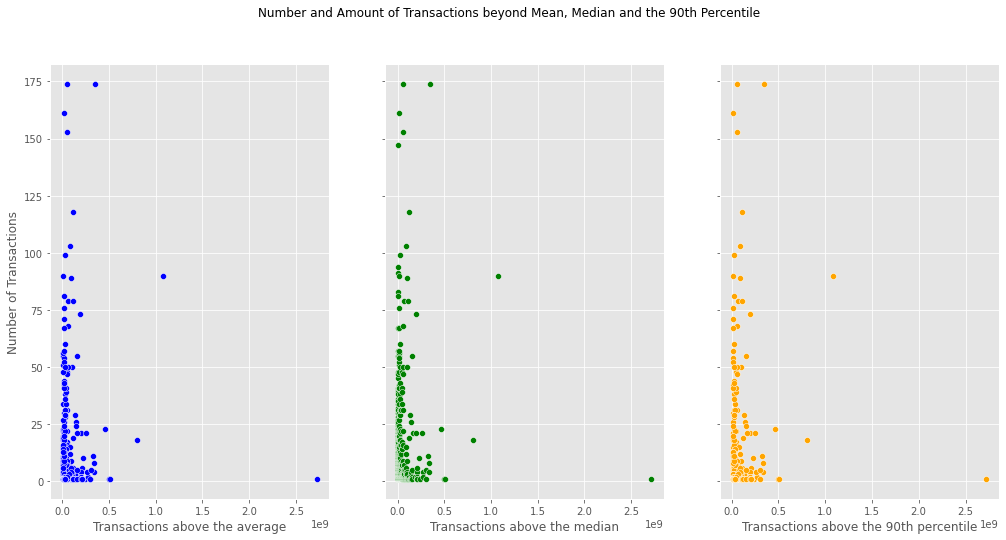

In [129]:
f, (ax1, ax2, ax3) = plt.subplots(figsize=(17, 8), ncols=3, sharey=True)

sb.scatterplot(x= 'amount_transactions', y= 'number_transactions', data = above_mean, ax=ax1, color = 'blue');
ax1.set(xlabel='Transactions above the average', ylabel='Number of Transactions');

sb.scatterplot(x= 'amount_transactions', y= 'number_transactions', data = above_median, ax=ax2, color='green');
ax2.set(xlabel='Transactions above the median', ylabel='');

sb.scatterplot(x= 'amount_transactions', y= 'number_transactions', data = above_percentile_90, ax=ax3, color = 'orange');
ax3.set(xlabel='Transactions above the 90th percentile', ylabel='Number of Transactions');

f.suptitle('Number and Amount of Transactions beyond Mean, Median and the 90th Percentile');

##### Histogram (log10)

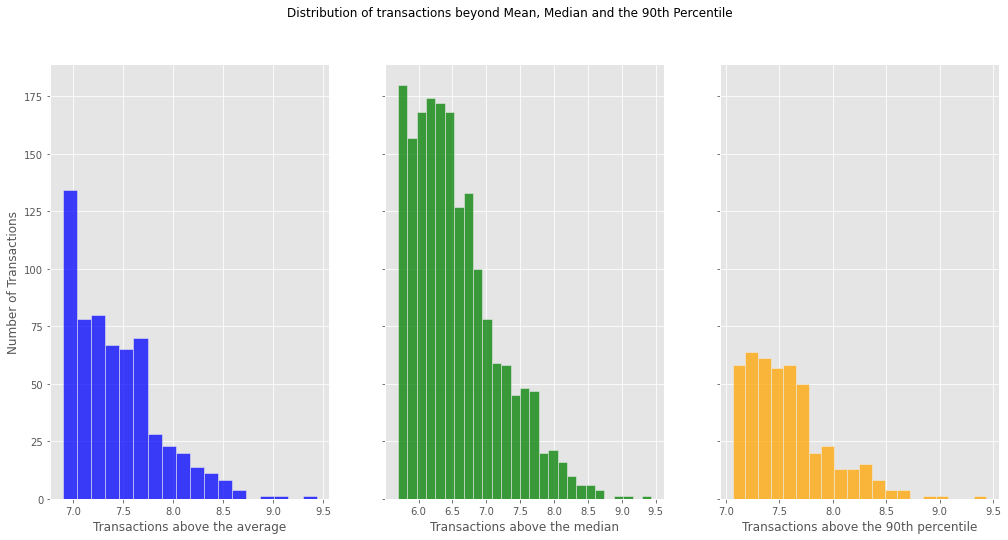

In [130]:
f, (ax1, ax2, ax3) = plt.subplots(figsize=(17, 8), ncols=3, sharey=True)

sb.histplot(data = np.log10(above_mean['amount_transactions']), ax=ax1, color = 'blue');
ax1.set(xlabel='Transactions above the average', ylabel='Number of Transactions');

sb.histplot(data = np.log10(above_median['amount_transactions']), ax=ax2, color='green');
ax2.set(xlabel='Transactions above the median', ylabel='');

sb.histplot(data = np.log10(above_percentile_90['amount_transactions']), ax=ax3, color = 'orange');
ax3.set(xlabel='Transactions above the 90th percentile', ylabel='Number of Transactions');

f.suptitle('Distribution of transactions beyond Mean, Median and the 90th Percentile');

# A DEEPER ANALYSIS

### Using SQL to create a column 'breakdown' containing data for each denomination.

In [131]:
%%sql
SELECT amount_transactions, number_transactions,
CASE WHEN amount_transactions >= 1000000000 THEN 'Billions'
WHEN amount_transactions >= 1000000 AND amount_transactions < 1000000000 THEN 'Millions'
WHEN amount_transactions >= 1000 AND amount_transactions < 1000000 THEN 'Thousands'
WHEN amount_transactions >= 100 AND amount_transactions < 1000 THEN 'Hundreds'
ELSE 'Tens'
END AS breakdown
FROM transaction_map
ORDER BY breakdown

 * sqlite:///FinCrime_Files.db
Done.


[(1080000000.0, 90.0, 'Billions'),
 (2721000000.0, 1.0, 'Billions'),
 (400.01, None, 'Hundreds'),
 (475.0, None, 'Hundreds'),
 (400.0, None, 'Hundreds'),
 (350.0, None, 'Hundreds'),
 (200.0, None, 'Hundreds'),
 (200.0, None, 'Hundreds'),
 (240.0, None, 'Hundreds'),
 (250.0, None, 'Hundreds'),
 (400.0, None, 'Hundreds'),
 (772.0, None, 'Hundreds'),
 (459.49, None, 'Hundreds'),
 (167.0, None, 'Hundreds'),
 (112.32, None, 'Hundreds'),
 (200.0, None, 'Hundreds'),
 (300.0, None, 'Hundreds'),
 (290.0, None, 'Hundreds'),
 (480.0, None, 'Hundreds'),
 (146.0, None, 'Hundreds'),
 (600.0, None, 'Hundreds'),
 (500.0, None, 'Hundreds'),
 (195.0, None, 'Hundreds'),
 (490.0, None, 'Hundreds'),
 (197.44, None, 'Hundreds'),
 (370.0, None, 'Hundreds'),
 (979.0, None, 'Hundreds'),
 (535.0, None, 'Hundreds'),
 (607.49, None, 'Hundreds'),
 (210.0, None, 'Hundreds'),
 (419.15, None, 'Hundreds'),
 (437.86, None, 'Hundreds'),
 (300.0, None, 'Hundreds'),
 (636.65, None, 'Hundreds'),
 (500.0, None, 'Hundreds'),
 (700.0, None, 'Hundreds'),
 (750.0, None, 'Hundreds'),
 (435.67, None, 'Hundreds'),
 (290.0, None, 'Hundreds'),
 (506.14, None, 'Hundreds'),
 (544.0, None, 'Hundreds'),
 (390.0, None, 'Hundreds'),
 (990.5, None, 'Hundreds'),
 (667.94, None, 'Hundreds'),
 (890.71, None, 'Hundreds'),
 (224.18, None, 'Hundreds'),
 (980.0, None, 'Hundreds'),
 (750.0, 1.0, 'Hundreds'),
 (825.0, 1.0, 'Hundreds'),
 (105.0, 1.0, 'Hundreds'),
 (375.0, 1.0, 'Hundreds'),
 (238.61, 1.0, 'Hundreds'),
 (205.48, 1.0, 'Hundreds'),
 (280.0, 1.0, 'Hundreds'),
 (284.25, 1.0, 'Hundreds'),
 (112.0, 1.0, 'Hundreds'),
 (140.44, 1.0, 'Hundreds'),
 (534.0, 1.0, 'Hundreds'),
 (190.92, 1.0, 'Hundreds'),
 (270.0, 1.0, 'Hundreds'),
 (339.89, 1.0, 'Hundreds'),
 (348.87, 1.0, 'Hundreds'),
 (359.1, 1.0, 'Hundreds'),
 (558.4, 1.0, 'Hundreds'),
 (808.57, 1.0, 'Hundreds'),
 (810.0, 1.0, 'Hundreds'),
 (819.99, 1.0, 'Hundreds'),
 (976.26, 1.0, 'Hundreds'),
 (275.0, 1.0, 'Hundreds'),
 (412.0, 1.0, 'Hundreds'),
 (640.0, 1.0, 'Hundreds'),
 (877.0, 1.0, 'Hundreds'),
 (434.0, 1.0, 'Hundreds'),
 (755.0, 1.0, 'Hundreds'),
 (590.0, 1.0, 'Hundreds'),
 (608.0, 3.0, 'Hundreds'),
 (180.0, 1.0, 'Hundreds'),
 (270.0, 1.0, 'Hundreds'),
 (370.0, 1.0, 'Hundreds'),
 (400.0, 1.0, 'Hundreds'),
 (353.06, 1.0, 'Hundreds'),
 (217.12, 1.0, 'Hundreds'),
 (750.0, 1.0, 'Hundreds'),
 (750.0, 1.0, 'Hundreds'),
 (121.67, 1.0, 'Hundreds'),
 (587.09, 1.0, 'Hundreds'),
 (680.0, 1.0, 'Hundreds'),
 (395.5, 1.0, 'Hundreds'),
 (765.0, 1.0, 'Hundreds'),
 (239.9, 1.0, 'Hundreds'),
 (516.91, 1.0, 'Hundreds'),
 (258.08, 1.0, 'Hundreds'),
 (100.0, 1.0, 'Hundreds'),
 (750.0, 1.0, 'Hundreds'),
 (643.0, 1.0, 'Hundreds'),
 (347.89, 1.0, 'Hundreds'),
 (413.0, 1.0, 'Hundreds'),
 (500.0, 1.0, 'Hundreds'),
 (700.0, 1.0, 'Hundreds'),
 (764.72, 1.0, 'Hundreds'),
 (600.0, 2.0, 'Hundreds'),
 (600.0, 2.0, 'Hundreds'),
 (600.0, 2.0, 'Hundreds'),
 (900.0, 3.0, 'Hundreds'),
 (600.0, 2.0, 'Hundreds'),
 (900.0, 3.0, 'Hundreds'),
 (600.0, 2.0, 'Hundreds'),
 (119.0, 1.0, 'Hundreds'),
 (788.12, 1.0, 'Hundreds'),
 (991.06, 1.0, 'Hundreds'),
 (56900000.0, 68.0, 'Millions'),
 (116000000.0, 118.0, 'Millions'),
 (1708383.56, 1.0, 'Millions'),
 (9962160.0, 4.0, 'Millions'),
 (3361767.58, 1.0, 'Millions'),
 (18400000.0, 3.0, 'Millions'),
 (13800000.0, 1.0, 'Millions'),
 (13400000.0, 7.0, 'Millions'),
 (16084899.0, 161.0, 'Millions'),
 (2436000.0, 4.0, 'Millions'),
 (4035652.52, 3.0, 'Millions'),
 (28000000.0, 1.0, 'Millions'),
 (4000000.0, 1.0, 'Millions'),
 (5397069.22, 2.0, 'Millions'),
 (2956552.0, 2.0, 'Millions'),
 (2970217.07, 2.0, 'Millions'),
 (3600000.0, 1.0, 'Millions'),
 (2250000.0, 1.0, 'Millions'),
 (40075000.0, 1.0, 'Millions'),
 (3552481.6, 4.0, 'Millions'),
 (3969642.0, 12.0, 'Millions'),
 (9171522.17, 2.0, 'Millions'),
 (7181193.66, 38.0, 'Millions'),
 (24075000.0, 38.0, 'Millions'),
 (17519500.0, 41.0, 'Millions'),
 (2400018.0, 6.0, 'Millions'),
 (1750000.0, 3.0, 'Millions'),
 (2012944.86, 3.0, 'Millions'),
 (3248764.0, 1.0, 'Millions'),
 (2000385.

In [132]:
breakdown = _.DataFrame()
breakdown.head(2)

amount_transactions  number_transactions breakdown
0         1.080000e+09                 90.0  Billions
1         2.721000e+09                  1.0  Billions

In [184]:
breakdown=_.DataFrame()
breakdown.to_csv('breakdown.csv')

##### The distributions of the denominations

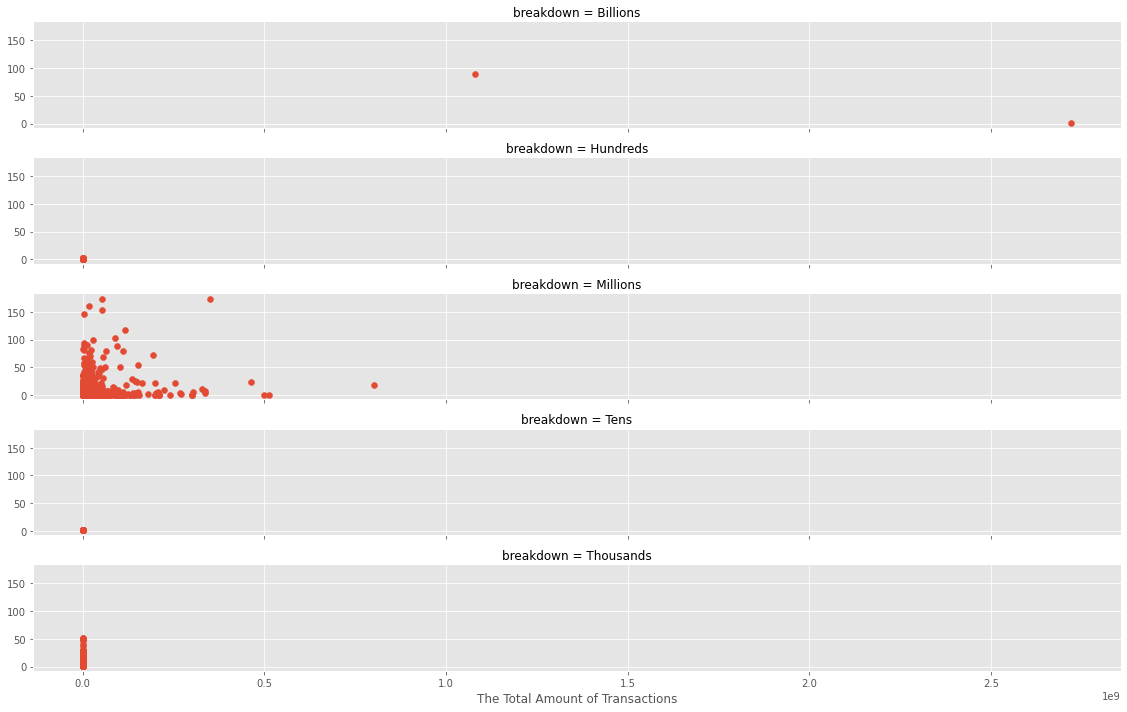

In [133]:
g = sb.FacetGrid(data = breakdown, row = 'breakdown', height=2, aspect=8, sharey=True);
g.map(plt.scatter, "amount_transactions", "number_transactions");
g.set_axis_labels("The Total Amount of Transactions", "");

##### Enhanced visualisation - How does the individual denomination fare?

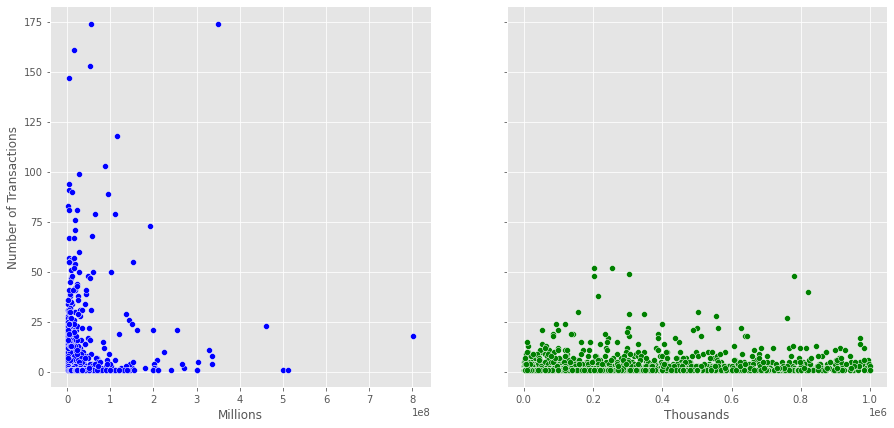

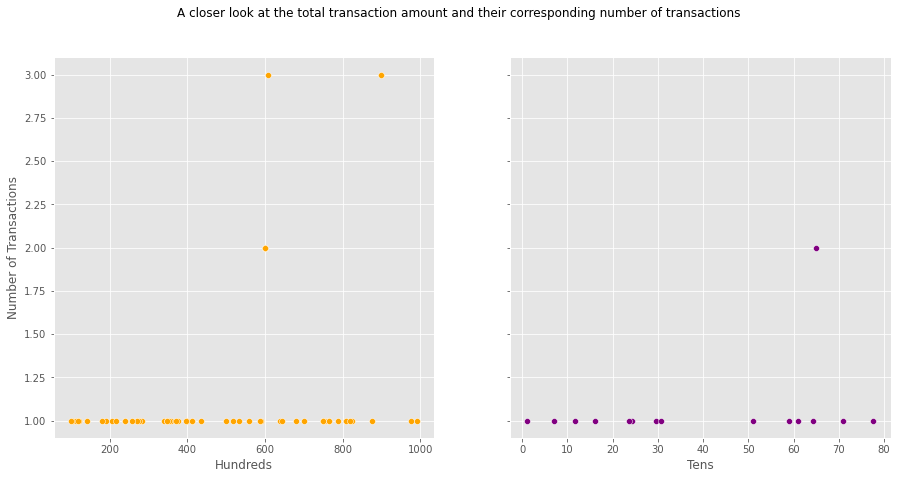

In [134]:
f, (ax1,ax2) = plt.subplots(figsize = (15,7), nrows=1, ncols=2, sharey=True)

sb.scatterplot(x= 'amount_transactions', y= 'number_transactions', data = breakdown.query('breakdown == "Millions"'),ax=ax1,color = 'blue');
ax1.set(xlabel='Millions', ylabel = 'Number of Transactions')

sb.scatterplot(x= 'amount_transactions', y= 'number_transactions', data = breakdown.query('breakdown == "Thousands"'),ax=ax2, color='green');
ax2.set(xlabel='Thousands', ylabel = '')

f, (ax3,ax4) = plt.subplots(figsize = (15,7), nrows=1, ncols=2, sharey=True)

sb.scatterplot(x= 'amount_transactions', y= 'number_transactions', data = breakdown.query('breakdown == "Hundreds"'), ax=ax3, color = 'orange');
ax3.set(xlabel='Hundreds', ylabel = 'Number of Transactions')

sb.scatterplot(x= 'amount_transactions', y= 'number_transactions', data = breakdown.query('breakdown == "Tens"'), ax=ax4, color = 'purple');
ax4.set(xlabel='Tens', ylabel = '')

f.suptitle('A closer look at the total transaction amount and their corresponding number of transactions');

### Using SQL to create a column 'breakdown' containing information on onset of transactions for each year.

In [222]:
%%sql
SELECT amount_transactions, number_transactions,
CASE WHEN strftime('%Y', begin_date) = '2008' THEN '2008'
WHEN strftime('%Y', begin_date) = '2009' THEN '2009'
WHEN strftime('%Y', begin_date) = '2010' THEN '2010'
WHEN strftime('%Y', begin_date) = '2011' THEN '2011'
WHEN strftime('%Y', begin_date) = '2012' THEN '2012'
WHEN strftime('%Y', begin_date) = '2013' THEN '2013'
WHEN strftime('%Y', begin_date) = '2014' THEN '2014'
WHEN strftime('%Y', begin_date) = '2015' THEN '2015'
WHEN strftime('%Y', begin_date) = '2016' THEN '2016'
ELSE '2017'
END AS annual_breakdown
FROM transaction_map
ORDER BY annual_breakdown DESC

 * sqlite:///FinCrime_Files.db
Done.


[(16084899.0, 161.0, '2017'),
 (9171522.17, 2.0, '2017'),
 (24075000.0, 38.0, '2017'),
 (50000.0, 1.0, '2017'),
 (36200000.0, 5.0, '2017'),
 (44700000.0, 7.0, '2017'),
 (18500000.0, 5.0, '2017'),
 (33800000.0, 6.0, '2017'),
 (7000000.0, 1.0, '2017'),
 (6750000.0, 1.0, '2017'),
 (3850000.0, 14.0, '2017'),
 (11600000.0, 18.0, '2017'),
 (1541912.9, 6.0, '2017'),
 (45400.0, 3.0, '2017'),
 (298402.0, 20.0, '2017'),
 (10000000.0, 1.0, '2017'),
 (3640.0, 1.0, '2017'),
 (16412.5, 1.0, '2017'),
 (24105.12, 1.0, '2017'),
 (26520.0, 1.0, '2017'),
 (50013.2, 1.0, '2017'),
 (63520.5, 1.0, '2017'),
 (82555.2, 1.0, '2017'),
 (54644.0, 1.0, '2017'),
 (115356.0, 1.0, '2017'),
 (11355.1, 1.0, '2017'),
 (19152.0, 1.0, '2017'),
 (33260.25, 1.0, '2017'),
 (37828.0, 1.0, '2017'),
 (37940.29, 1.0, '2017'),
 (54797.6, 1.0, '2017'),
 (73597.19, 1.0, '2017'),
 (74517.48, 1.0, '2017'),
 (119687.33, 1.0, '2017'),
 (229976.02, 1.0, '2017'),
 (276133.69, 1.0, '2017'),
 (276133.69, 1.0, '2017'),
 (1101600.0, 1.0, '2017'),
 (1240300.0, 1.0, '2017'),
 (1675278.0, 1.0, '2017'),
 (771165.0, 1.0, '2017'),
 (482690.0, 1.0, '2017'),
 (6975000.0, 2.0, '2017'),
 (61192.0, 1.0, '2017'),
 (200000.0, 1.0, '2017'),
 (15000.0, 1.0, '2017'),
 (10000.0, 1.0, '2017'),
 (350000.0, 1.0, '2017'),
 (350000.0, 1.0, '2017'),
 (15000.0, 1.0, '2017'),
 (10000.0, 1.0, '2017'),
 (200000.0, 1.0, '2017'),
 (200000.0, 1.0, '2017'),
 (15000.0, 1.0, '2017'),
 (200000.0, 1.0, '2017'),
 (500000.0, 1.0, '2017'),
 (500000.0, 1.0, '2017'),
 (500000.0, 1.0, '2017'),
 (500000.0, 1.0, '2017'),
 (49132978.0, 17.0, '2017'),
 (2289240.0, 8.0, '2017'),
 (2480000.0, 8.0, '2017'),
 (100000.0, 1.0, '2017'),
 (4920000.0, 6.0, '2017'),
 (63464.0, 1.0, '2017'),
 (70748.0, 9.0, '2017'),
 (1237163.0, 14.0, '2017'),
 (300000.0, 1.0, '2017'),
 (600000.0, 1.0, '2017'),
 (200000.0, 1.0, '2017'),
 (900000.0, 1.0, '2017'),
 (277307.29, 1.0, '2017'),
 (945000.0, 1.0, '2017'),
 (8524.08, 1.0, '2017'),
 (1354708.61, 1.0, '2017'),
 (1114906.08, 1.0, '2017'),
 (1961821.0, 1.0, '2017'),
 (7769.89, 1.0, '2017'),
 (15435035.0, 1.0, '2017'),
 (95000000.0, 2.0, '2017'),
 (1321500.0, 11.0, '2017'),
 (142497.0, 7.0, '2017'),
 (199881.23, 4.0, '2017'),
 (18061500.0, 54.0, '2017'),
 (50000000.0, 1.0, '2017'),
 (70000000.0, 3.0, '2017'),
 (1056774.07, 4.0, '2017'),
 (2024000.0, 1.0, '2017'),
 (345351.0, 1.0, '2017'),
 (5950.0, 2.0, '2017'),
 (7506.21, 3.0, '2017'),
 (250000.0, 1.0, '2017'),
 (7279725.0, 3.0, '2017'),
 (9494000.0, 1.0, '2017'),
 (10000000.0, 1.0, '2017'),
 (12800000.0, 1.0, '2017'),
 (11000000.0, 3.0, '2017'),
 (7000000.0, 2.0, '2017'),
 (665657.56, 11.0, '2017'),
 (531159.9, 1.0, '2017'),
 (465994.71, 1.0, '2017'),
 (591686.4, 3.0, '2017'),
 (971254.64, 17.0, '2017'),
 (1391814.73, 34.0, '2017'),
 (3134934.12, 55.0, '2017'),
 (3254855.38, 15.0, '2017'),
 (29200000.0, 31.0, '2017'),
 (27202347.0, 2.0, '2017'),
 (37000000.0, 2.0, '2017'),
 (28400000.0, 5.0, '2017'),
 (54300000.0, 174.0, '2017'),
 (83950000.0, 15.0, '2017'),
 (150000.0, 1.0, '2017'),
 (250000.0, 1.0, '2017'),
 (15000.0, 1.0, '2017'),
 (500000.0, 1.0, '2017'),
 (31500.0, 1.0, '2017'),
 (1000000.0, 1.0, '2017'),
 (1100000.0, 1.0, '2017'),
 (61762.0, 1.0, '2017'),
 (1080000000.0, 90.0, '2017'),
 (3134.0, 1.0, '2017'),
 (3134.0, 1.0, '2017'),
 (3134.0, 1.0, '2017'),
 (2971700.0, 5.0, '2017'),
 (7100000.0, 1.0, '2017'),
 (20000.0, 1.0, '2017'),
 (195000.0, 2.0, '2017'),
 (6000000.0, 3.0, '2017'),
 (899457.0, 1.0, '2017'),
 (2130.0, 1.0, '2017'),
 (107941.92, 1.0, '2017'),
 (130000.0, 1.0, '2017'),
 (229976.02, 1.0, '2017'),
 (326050.0, 1.0, '2017'),
 (489240.0, 1.0, '2017'),
 (272188.0, 1.0, '2017'),
 (683930.0, 1.0, '2017'),
 (5000000.0, 1.0, '2017'),
 (5000000.0, 1.0, '2017'),
 (18000.0, 1.0, '2017'),
 (18000.0, 4.0, '2017'),
 (200000.0, 1.0, '2017'),
 (5000.0, 1.0, '2017'),
 (8000.0, 2.0, '2017'),
 (7.14, 1.0, '2017'),
 (48316.0, 2.0, '2017'),
 (1124500.0, 3.0, '2017'),
 (2000000.0, 1.0, '2017'),
 (2200000.0, 2.0, '2017'),
 (1400000.0, 1.0, '2017'),


In [223]:
annual_breakdown = _.DataFrame()
annual_breakdown.head()

amount_transactions  number_transactions annual_breakdown
0          16084899.00                161.0             2017
1           9171522.17                  2.0             2017
2          24075000.00                 38.0             2017
3             50000.00                  1.0             2017
4          36200000.00                  5.0             2017

### Breakdown of transactions in each year

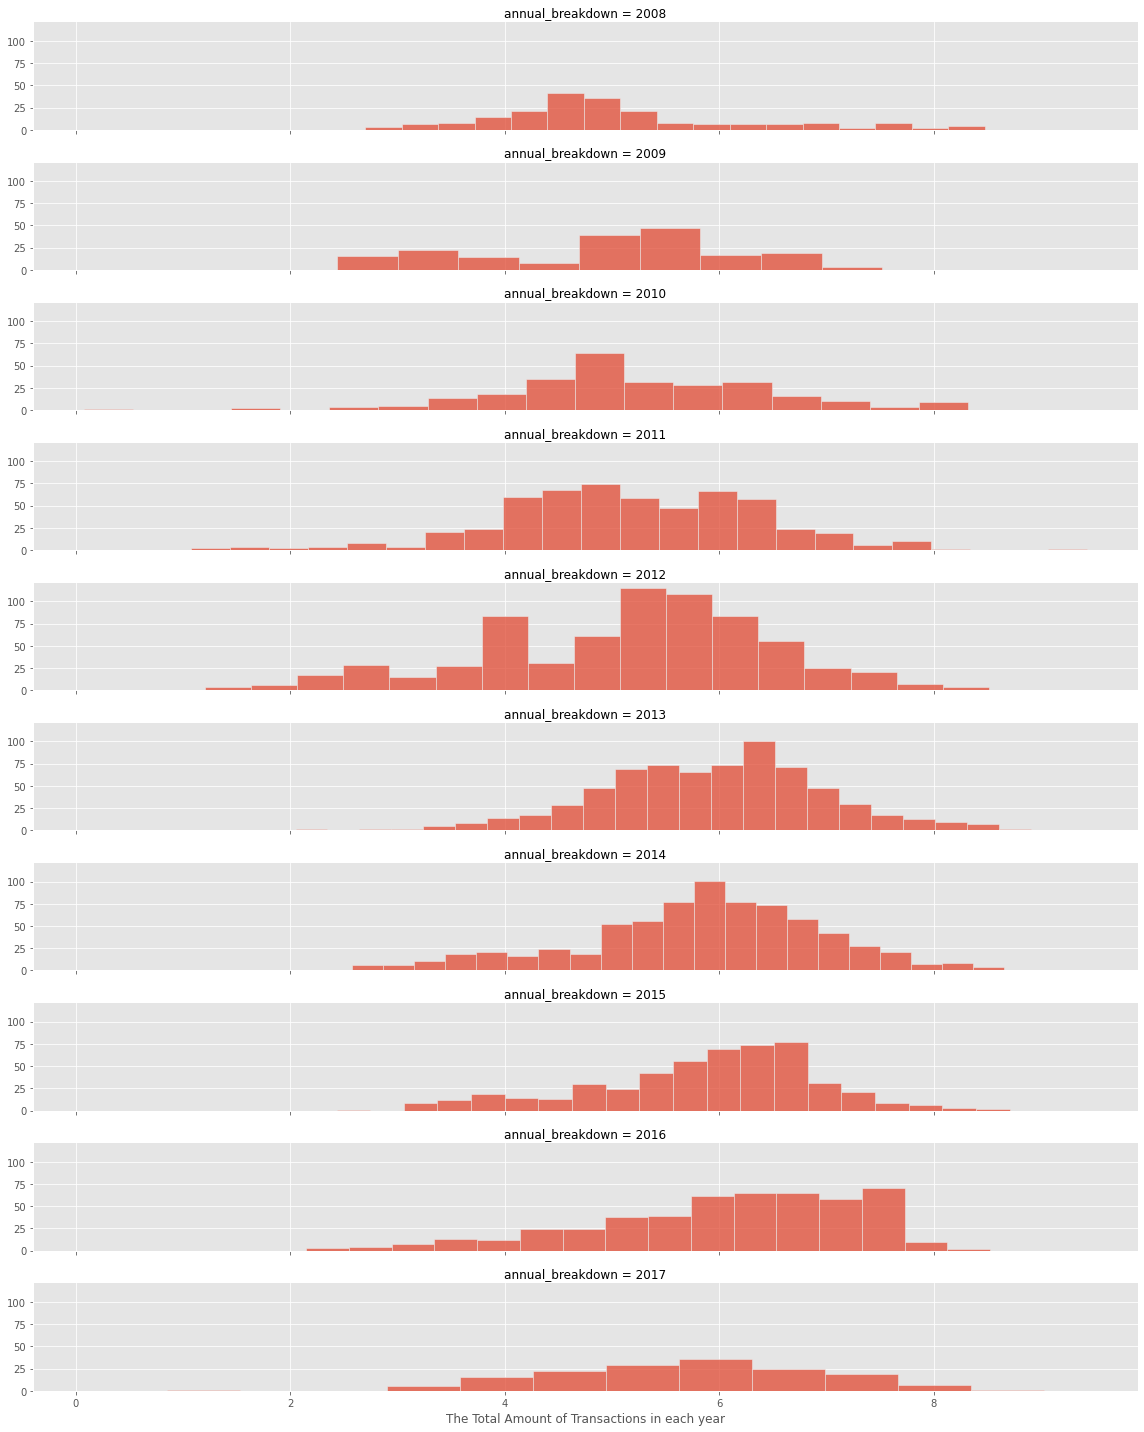

In [224]:
annual_breakdown['amount_transactions'] = np.log10(annual_breakdown['amount_transactions'])
annual_breakdown.sort_values('annual_breakdown', inplace=True);
g=sb.FacetGrid(data = annual_breakdown, row = 'annual_breakdown', height=2, aspect=8);
g.map(sb.histplot, 'amount_transactions');
g.set_axis_labels("The Total Amount of Transactions in each year", "");

##### The trend in filing SARs based on transaction date.

In [138]:
%%sql
SELECT filer_org_name,
CASE WHEN strftime('%Y', begin_date) = '2008' THEN '2008'
WHEN strftime('%Y', begin_date) = '2009' THEN '2009'
WHEN strftime('%Y', begin_date) = '2010' THEN '2010'
WHEN strftime('%Y', begin_date) = '2011' THEN '2011'
WHEN strftime('%Y', begin_date) = '2012' THEN '2012'
WHEN strftime('%Y', begin_date) = '2013' THEN '2013'
WHEN strftime('%Y', begin_date) = '2014' THEN '2014'
WHEN strftime('%Y', begin_date) = '2015' THEN '2015'
WHEN strftime('%Y', begin_date) = '2016' THEN '2016'
ELSE '2017'
END AS annual_breakdown
FROM transaction_map
ORDER BY annual_breakdown DESC

 * sqlite:///FinCrime_Files.db
Done.


[('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('Deutsche Bank AG', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('Barclays Plc', '2017'),
 ('Barclays Plc', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('Standard Chartered Plc', '2017'),
 ('Standard Chartered Plc', '2017'),
 ('Standard Chartered Plc', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('Barclays Plc', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('Deutsche Bank AG', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('China Investment Corporation', '2017'),
 ('JP Morgan Chase & Co.', '2017'),
 ('JP Morgan Chase & Co.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon Corp.', '2017'),
 ('The Bank of New York Mellon 

In [139]:
annual_filer=_.DataFrame()
annual_filer.head(3)

filer_org_name annual_breakdown
0  The Bank of New York Mellon Corp.             2017
1  The Bank of New York Mellon Corp.             2017
2  The Bank of New York Mellon Corp.             2017

### SARs filed on the transactions between 2008 and 2017 (August)

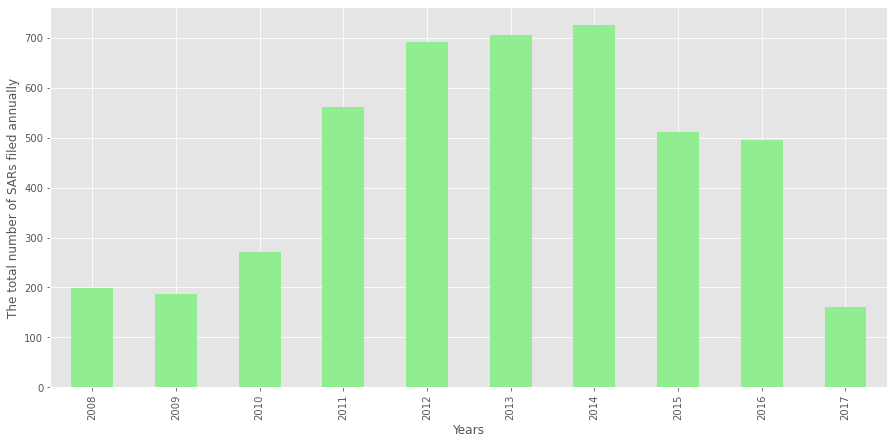

In [204]:
f, ax = plt.subplots(figsize=(15,7));
annual_filer.groupby('annual_breakdown')['filer_org_name'].count().plot(kind='bar', color='lightgreen');
ax.set(xlabel='Years', ylabel=('The total number of SARs filed annually'));

### Ranking Banks based on the amount of transactions. Highest > Lowest

In [141]:
%%sql 
SELECT amount_transactions, begin_date, end_date, originator_bank, beneficiary_bank, number_transactions,
RANK() OVER (ORDER BY amount_transactions DESC)
FROM transaction_map
LIMIT 10

 * sqlite:///FinCrime_Files.db
Done.


[(2721000000.0, '2011-08-08', '2011-08-08', 'Amsterdam Trade Bank NV', 'Rosbank', 1.0, 1),
 (1080000000.0, '2007-01-08', '2013-01-04', 'JPMorgan Chase Bank', 'Deutsche Bank AG -- London Branch', 90.0, 2),
 (803000000.0, '2013-05-23', '2016-02-24', 'Gazprombank', 'JPMorgan', 18.0, 3),
 (512000000.0, '2015-12-11', '2015-12-11', 'JPMorgan Chase Bank National', 'Ocbc Wing Hang Bank', 1.0, 4),
 (500000000.0, '2015-10-20', '2015-10-20', 'Bank of China', 'Kbl European Private Bankers S.A.', 1.0, 5),
 (462000000.0, '2013-10-25', '2014-08-22', 'Citibank, N.A.', 'Stanbic Bank', 23.0, 6),
 (457984607.0, '2014-09-30', '2014-09-30', 'Deutsche Bank AG', 'Usb AG', None, 7),
 (350082732.0, '2013-06-05', '2014-09-04', 'Amsterdam Trade Bank NV', 'Raiffeisen Bank International Ag', 174.0, 8),
 (336828000.0, '2014-03-07', '2014-03-19', 'Societe Generale Private Banking', 'Societe Generale Bank And Trust Singapore SA', 4.0, 9),
 (336194500.0, '2016-03-29', '2016-04-06', 'ING Netherland NV', 'Rigensis Bank AS', 8.0, 10)]

### How did the money get transfered from Amsterdam Trade to Rosbank. It appeared via the correspondent banks listed here as entity

In [142]:
%%sql 
SELECT amount_transactions, begin_date, end_date, originator_bank, entity_b, beneficiary_bank, number_transactions,
DENSE_RANK() OVER (ORDER BY amount_transactions DESC)
FROM transaction_map t
INNER JOIN bank_connections b
ON t.icij_sar_id = b.icij_sar_id
LIMIT 10

 * sqlite:///FinCrime_Files.db
Done.


[(2721000000.0, '2011-08-08', '2011-08-08', 'Amsterdam Trade Bank NV', 'Credit Suisse AG', 'Rosbank', 1.0, 1),
 (2721000000.0, '2011-08-08', '2011-08-08', 'Amsterdam Trade Bank NV', 'Euroclear Bank SA', 'Rosbank', 1.0, 1),
 (2721000000.0, '2011-08-08', '2011-08-08', 'Amsterdam Trade Bank NV', 'Ojsc Jscb International Financial Club', 'Rosbank', 1.0, 1),
 (2721000000.0, '2011-08-08', '2011-08-08', 'Amsterdam Trade Bank NV', 'Rosbank', 'Rosbank', 1.0, 1),
 (2721000000.0, '2011-08-08', '2011-08-08', 'Amsterdam Trade Bank NV', 'Sberbank of Russia', 'Rosbank', 1.0, 1),
 (2721000000.0, '2011-08-08', '2011-08-08', 'Amsterdam Trade Bank NV', 'UniCredit Bank, Cjsc', 'Rosbank', 1.0, 1),
 (2721000000.0, '2011-08-08', '2011-08-08', 'Amsterdam Trade Bank NV', 'VTB Bank', 'Rosbank', 1.0, 1),
 (803000000.0, '2013-05-23', '2016-02-24', 'Gazprombank', 'Bank of Cyprus Public Company Limited', 'JPMorgan', 18.0, 2),
 (803000000.0, '2013-05-23', '2016-02-24', 'Gazprombank', 'Deutsche Bank AG', 'JPMorgan', 18.0, 2),
 (803000000.0, '2013-05-23', '2016-02-24', 'Gazprombank', 'Deutsche Bank Ooo', 'JPMorgan', 18.0, 2)]

##### SQL

In [144]:
%%sql
SELECT SUM(amount_transactions) as total_amt_money, originator_bank_country, beneficiary_bank_country, 
SUM(number_transactions) as total_number_transactions
FROM transaction_map
GROUP BY originator_bank_country
ORDER BY total_amt_money DESC
LIMIT 10

 * sqlite:///FinCrime_Files.db
Done.


[(6437229703.870004, 'Latvia', 'United States', 2256.0),
 (4968629319.940001, 'Netherlands', 'Switzerland', 475.0),
 (4182906092.18, 'Switzerland', 'United States', 759.0),
 (3607697173.8599997, 'United Kingdom', 'Sweden', 968.0),
 (3502306533.1499968, 'Russia', 'Cyprus', 2760.0),
 (1471292557.9, 'Singapore', 'United Kingdom', 908.0),
 (1410444280.7400002, 'Hong Kong', 'Lebanon', 557.0),
 (1188987125.77, 'United States', 'Singapore', 1194.0),
 (1020048956.3, 'Cayman Islands', 'United States', 233.0),
 (915743870.3599999, 'Belgium', 'Germany', 38.0)]

In [145]:
top_10_total_transactions = _.DataFrame()
top_10_total_transactions.shape

(10, 4)

In [146]:
px.scatter(top_10_total_transactions, x= 'beneficiary_bank_country', y= 'originator_bank_country', size = 'total_amt_money')

#### These two are the list of countries on the non-coperative jurisdictions report made in 2012 and 2016, respectively.

__2012__
Cuba, Bolivia, Ethiopia, Ghana, Indonesia, Kenya, Myanmar, Nigeria, Pakistan, São Tomé and Príncipe, Sri Lanka, Syria,   
Tanzania, Thailand, Turkey, Iran, North Korea

__2016__
Afghanistan, Bosnia and Herzegovina, Iran, North Korea, Iraq, Lao PDR, Syria, Uganda, Vanuatu, Yemen

### To pull out data containing the countries listed in 2012

In [147]:
%%sql WITH high_risk AS (

SELECT begin_date, end_date, originator_bank, originator_bank_country, beneficiary_bank, entity_b_country, entity_b,
beneficiary_bank_country, number_transactions, amount_transactions
FROM transaction_map t
INNER JOIN bank_connections b
ON t.icij_sar_id = b.icij_sar_id
WHERE originator_bank_country IN ('Cuba', 'Bolivia', 'Ethiopia', 'Ghana', 'Indonesia', 'Kenya', 'Myanmar', 
                                   'Nigeria', 'Pakistan', 'São Tomé and Príncipe', 'Sri Lanka', 'Syria', 
                                   'Tanzania', 'Thailand', 'Turkey', 'Iran', 'North Korea')
ORDER BY amount_transactions DESC)

SELECT begin_date, end_date, originator_bank, originator_bank_country, entity_b, entity_b_country,
beneficiary_bank, beneficiary_bank_country, amount_transactions
FROM high_risk
WHERE strftime('%Y', begin_date) = '2012'
ORDER BY amount_transactions DESC

 * sqlite:///FinCrime_Files.db
Done.


[('2012-03-02', '2012-07-31', 'Kuwait Turkish Participation Bank Inc', 'Turkey', 'Asya Katilim Bankasi A S', 'Turkey', 'Standard Chartered Bank', 'United Arab Emirates', 3792410.0),
 ('2012-03-02', '2012-07-31', 'Kuwait Turkish Participation Bank Inc', 'Turkey', 'Emirates Nbd Bank PJSC Dubai', 'United Arab Emirates', 'Standard Chartered Bank', 'United Arab Emirates', 3792410.0),
 ('2012-03-02', '2012-07-31', 'Kuwait Turkish Participation Bank Inc', 'Turkey', 'Korea Exchange Bank', 'South Korea', 'Standard Chartered Bank', 'United Arab Emirates', 3792410.0),
 ('2012-03-02', '2012-07-31', 'Kuwait Turkish Participation Bank Inc', 'Turkey', 'Kuwait Turkish Participation Bank Inc', 'Turkey', 'Standard Chartered Bank', 'United Arab Emirates', 3792410.0),
 ('2012-03-02', '2012-07-31', 'Kuwait Turkish Participation Bank Inc', 'Turkey', 'National Bank of Pakistan', 'Turkmenistan', 'Standard Chartered Bank', 'United Arab Emirates', 3792410.0),
 ('2012-03-02', '2012-07-31', 'Kuwait Turkish Participation Bank Inc', 'Turkey', 'National Bank of Ras Al Kaimah', 'United Arab Emirates', 'Standard Chartered Bank', 'United Arab Emirates', 3792410.0),
 ('2012-03-02', '2012-07-31', 'Kuwait Turkish Participation Bank Inc', 'Turkey', 'Standard Chartered Bank', 'United Arab Emirates', 'Standard Chartered Bank', 'United Arab Emirates', 3792410.0),
 ('2012-07-06', '2012-07-11', 'Asya Katilim Bankasi A S ', 'Turkey', 'Asya Katilim Bankasi A S', 'Turkey', 'Standard Chartered Bank', 'United Arab Emirates', 1386488.0),
 ('2012-07-06', '2012-07-11', 'Asya Katilim Bankasi A S ', 'Turkey', 'Emirates Nbd Bank PJSC Dubai', 'United Arab Emirates', 'Standard Chartered Bank', 'United Arab Emirates', 1386488.0),
 ('2012-07-06', '2012-07-11', 'Asya Katilim Bankasi A S ', 'Turkey', 'Korea Exchange Bank', 'South Korea', 'Standard Chartered Bank', 'United Arab Emirates', 1386488.0),
 ('2012-07-06', '2012-07-11', 'Asya Katilim Bankasi A S ', 'Turkey', 'Kuwait Turkish Participation Bank Inc', 'Turkey', 'Standard Chartered Bank', 'United Arab Emirates', 1386488.0),
 ('2012-07-06', '2012-07-11', 'Asya Katilim Bankasi A S ', 'Turkey', 'National Bank of Pakistan', 'Turkmenistan', 'Standard Chartered Bank', 'United Arab Emirates', 1386488.0),
 ('2012-07-06', '2012-07-11', 'Asya Katilim Bankasi A S ', 'Turkey', 'National Bank of Ras Al Kaimah', 'United Arab Emirates', 'Standard Chartered Bank', 'United Arab Emirates', 1386488.0),
 ('2012-07-06', '2012-07-11', 'Asya Katilim Bankasi A S ', 'Turkey', 'Standard Chartered Bank', 'United Arab Emirates', 'Standard Chartered Bank', 'United Arab Emirates', 1386488.0),
 ('2012-02-21', '2012-02-21', 'HSBC Turkey Trade Services', 'Turkey', 'Asya Katilim Bankasi A.S.', 'Turkey', 'Emirates Nbd Bank PJSC', 'United Arab Emirates', 817399.0),
 ('2012-02-21', '2012-02-21', 'HSBC Turkey Trade Services', 'Turkey', 'Bank of Scotland Plc', 'United Kingdom', 'Emirates Nbd Bank PJSC', 'United Arab Emirates', 817399.0),
 ('2012-02-21', '2012-02-21', 'HSBC Turkey Trade Services', 'Turkey', 'DBS Bank Ltd', 'Singapore', 'Emirates Nbd Bank PJSC', 'United Arab Emirates', 817399.0),
 ('2012-02-21', '2012-02-21', 'HSBC Turkey Trade Services', 'Turkey', 'ING Bank A.S.', 'Turkey', 'Emirates Nbd Bank PJSC', 'United Arab Emirates', 817399.0),
 ('2012-02-21', '2012-02-21', 'HSBC Turkey Trade Services', 'Turkey', 'Korea Exchange Bank', 'South Korea', 'Emirates Nbd Bank PJSC', 'United Arab Emirates', 817399.0),
 ('2012-02-21', '2012-02-21', 'HSBC Turkey Trade Services', 'Turkey', 'Turkiye Is Bankasi', 'Turkey', 'Emirates Nbd Bank PJSC', 'United Arab Emirates', 817399.0),
 ('2012-06-12', '2012-06-12', 'Turkiye Is Bankasi', 'Turkey', 'Asya Katilim Bankasi A.S.', 'Turkey', 'E Trade Clearing Llc', 'United States', 97940.0),
 ('2012-06-12', '2012-06-12', 'Turkiye Is Bankasi', 'Turkey', 'Bank of Scotland Plc', 'United Kingdom', 'E Trade Clearing Llc', 'United States', 97940.0),
 ('2012-06-12', '2012-06-12', 'Turkiye Is Bankasi', 'Turkey', 'DBS Bank Ltd', 'Singapore', 'E 

In [148]:
high_risk_2012 = _.DataFrame()
high_risk_2012.shape

(40, 9)

In [149]:
high_risk_2012.groupby('originator_bank_country').sum('amount_transactions')

amount_transactions
originator_bank_country                     
Kenya                                 3750.0
Nigeria                             119700.0
Tanzania                             36819.0
Turkey                            41744320.0

In [150]:
high_risk_2012.amount_transactions.sum() #41 million USD moved from high-risk countries in one year!

41904589.0

In [151]:
high_risk_2012

begin_date    end_date                        originator_bank  \
0   2012-03-02  2012-07-31  Kuwait Turkish Participation Bank Inc   
1   2012-03-02  2012-07-31  Kuwait Turkish Participation Bank Inc   
2   2012-03-02  2012-07-31  Kuwait Turkish Participation Bank Inc   
3   2012-03-02  2012-07-31  Kuwait Turkish Participation Bank Inc   
4   2012-03-02  2012-07-31  Kuwait Turkish Participation Bank Inc   
5   2012-03-02  2012-07-31  Kuwait Turkish Participation Bank Inc   
6   2012-03-02  2012-07-31  Kuwait Turkish Participation Bank Inc   
7   2012-07-06  2012-07-11              Asya Katilim Bankasi A S    
8   2012-07-06  2012-07-11              Asya Katilim Bankasi A S    
9   2012-07-06  2012-07-11              Asya Katilim Bankasi A S    
10  2012-07-06  2012-07-11              Asya Katilim Bankasi A S    
11  2012-07-06  2012-07-11              Asya Katilim Bankasi A S    
12  2012-07-06  2012-07-11              Asya Katilim Bankasi A S    
13  2012-07-06  2012-07-11              Asya Katilim Bankasi A S    
14  2012-02-21  2012-02-21             HSBC Turkey Trade Services   
15  2012-02-21  2012-02-21             HSBC Turkey Trade Services   
16  2012-02-21  2012-02-21             HSBC Turkey Trade Services   
17  2012-02-21  2012-02-21             HSBC Turkey Trade Services   
18  2012-02-21  2012-02-21             HSBC Turkey Trade Services   
19  2012-02-21  2012-02-21             HSBC Turkey Trade Services   
20  2012-06-12  2012-06-12                     Turkiye Is Bankasi   
21  2012-06-12  2012-06-12                     Turkiye Is Bankasi   
22  2012-06-12  2012-06-12                     Turkiye Is Bankasi   
23  2012-06-12  2012-06-12                     Turkiye Is Bankasi   
24  2012-06-12  2012-06-12                     Turkiye Is Bankasi   
25  2012-06-12  2012-06-12                     Turkiye Is Bankasi   
26  2012-01-24  2012-01-24                              Exim Bank   
27  2012-11-06  2012-11-06             United Bank For Africa Plc   
28  2012-11-06  2012-11-06             United Bank For Africa Plc   
29  2012-11-06  2012-11-06             United Bank For Africa Plc   
30  2012-11-06  2012-11-06             United Bank For Africa Plc   
31  2012-11-06  2012-11-06             United Bank For Africa Plc   
32  2012-11-06  2012-11-06             United Bank For Africa Plc   
33  2012-11-06  2012-11-06             United Bank For Africa Plc   
34  2012-11-06  2012-11-06             United Bank For Africa Plc   
35  2012-11-06  2012-11-06             United Bank For Africa Plc   
36  2012-11-06  2012-11-06             United Bank For Africa Plc   
37  2012-11-06  2012-11-06             United Bank For Africa Plc   
38  2012-11-06  2012-11-06             United Bank For Africa Plc   
39  2012-06-12  2012-06-12                        Equity Bank Ltd   

   originator_bank_country                                   entity_b  \
0                   Turkey                   Asya Katilim Bankasi A S   
1                   Turkey               Emirates Nbd Bank PJSC Dubai   
2                   Turkey                        Korea Exchange Bank   
3                   Turkey      Kuwait Turkish Participation Bank Inc   
4                   Turkey                  National Bank of Pakistan   
5                   Turkey             National Bank of Ras Al Kaimah   
6                   Turkey                    Standard Chartered Bank   
7                   Turkey                   Asya Katilim Bankasi A S   
8                   Turkey               Emirates Nbd Bank PJSC Dubai   
9                   Turkey                        Korea Exchange Bank   
10                  Turkey      Kuwait Turkish Participation Bank Inc   
11                  Turkey                  National Bank of Pakistan   
12                  Turkey             National Bank of Ras Al Kaimah   
13                  Turkey                    Standard Chartered Bank   
14                  Turkey                  Asya Katilim Bankasi A.S.   
15    

##### SQL : High risk countries as per the FATF in 2012

In [152]:
%%sql WITH high_risk AS (

SELECT begin_date, end_date, originator_bank, originator_bank_country, beneficiary_bank, entity_b_country, entity_b,
beneficiary_bank_country, number_transactions, amount_transactions
FROM transaction_map t
INNER JOIN bank_connections b
ON t.icij_sar_id = b.icij_sar_id
WHERE beneficiary_bank_country IN ('Cuba', 'Bolivia', 'Ethiopia', 'Ghana', 'Indonesia', 'Kenya', 'Myanmar', 
                                   'Nigeria', 'Pakistan', 'São Tomé and Príncipe', 'Sri Lanka', 'Syria', 
                                   'Tanzania', 'Thailand', 'Turkey', 'Iran', 'North Korea')
ORDER BY amount_transactions DESC)

SELECT begin_date, end_date, originator_bank, originator_bank_country, entity_b, entity_b_country,
beneficiary_bank, beneficiary_bank_country, amount_transactions
FROM high_risk
WHERE strftime('%Y', begin_date) = '2012'
ORDER BY amount_transactions DESC

 * sqlite:///FinCrime_Files.db
Done.


[('2012-10-09', '2012-12-04', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Allied Bank Limited', 'Pakistan', 'Allied Bank Limited', 'Pakistan', 299670.0),
 ('2012-10-09', '2012-12-04', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Bank Al Habib Ltd', 'Pakistan', 'Allied Bank Limited', 'Pakistan', 299670.0),
 ('2012-10-09', '2012-12-04', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Meezan Bank Limited', 'Pakistan', 'Allied Bank Limited', 'Pakistan', 299670.0),
 ('2012-10-09', '2012-12-04', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'United Bank Limited', 'Pakistan', 'Allied Bank Limited', 'Pakistan', 299670.0),
 ('2012-10-09', '2012-12-04', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Allied Bank Limited', 'Pakistan', 299670.0),
 ('2012-10-10', '2012-11-05', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Allied Bank Limited', 'Pakistan', 'United Bank Limited', 'Pakistan', 299640.0),
 ('2012-10-10', '2012-11-05', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Bank Al Habib Ltd', 'Pakistan', 'United Bank Limited', 'Pakistan', 299640.0),
 ('2012-10-10', '2012-11-05', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Meezan Bank Limited', 'Pakistan', 'United Bank Limited', 'Pakistan', 299640.0),
 ('2012-10-10', '2012-11-05', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'United Bank Limited', 'Pakistan', 'United Bank Limited', 'Pakistan', 299640.0),
 ('2012-10-10', '2012-11-05', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'United Bank Limited', 'Pakistan', 299640.0),
 ('2012-12-04', '2012-12-06', 'Banque Misr', 'United Arab Emirates', 'Bank Muscat Al Ahli Al Omani', 'Oman', 'PT Bank Central Asia Tbk', 'Indonesia', 256631.0),
 ('2012-12-04', '2012-12-06', 'Banque Misr', 'United Arab Emirates', 'Commercial Bank of Ceylon Plc', 'United Kingdom', 'PT Bank Central Asia Tbk', 'Indonesia', 256631.0),
 ('2012-12-04', '2012-12-06', 'Banque Misr', 'United Arab Emirates', 'National Westminster Bank Plc', 'United Kingdom', 'PT Bank Central Asia Tbk', 'Indonesia', 256631.0),
 ('2012-12-04', '2012-12-06', 'Banque Misr', 'United Arab Emirates', 'PT Bank Central Asia Tbk', 'Indonesia', 'PT Bank Central Asia Tbk', 'Indonesia', 256631.0),
 ('2012-12-04', '2012-12-06', 'Banque Misr', 'United Arab Emirates', 'Ping An Bank Co Ltd', 'China', 'PT Bank Central Asia Tbk', 'Indonesia', 256631.0),
 ('2012-09-10', '2012-10-03', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Allied Bank Limited', 'Pakistan', 'Allied Bank Limited', 'Pakistan', 249500.0),
 ('2012-09-10', '2012-10-03', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Bank Al Habib Ltd', 'Pakistan', 'Allied Bank Limited', 'Pakistan', 249500.0),
 ('2012-09-10', '2012-10-03', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Meezan Bank Limited', 'Pakistan', 'Allied Bank Limited', 'Pakistan', 249500.0),
 ('2012-09-10', '2012-10-03', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'United Bank Limited', 'Pakistan', 'Allied Bank Limited', 'Pakistan', 249500.0),
 ('2012-09-10', '2012-10-03', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Allied Bank Limited', 'Pakistan', 249500.0),
 ('2012-12-10', '2012-12-11', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Habib Bank AG Zurich', 'United Arab Emirates', 'Standard Chartered Bank', 'Pakistan', 199860.0),
 ('2012-12-10', '2012-12-11', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Standard Chartered Bank', 'Pakistan', 'Standard Chartered Bank', 'Pakistan', 199860.0),
 ('2012-12-10', '2012-12-11', 'Wall Street Exchange Centre Llc', 'United Arab Emirates', 'Standard Chartered Bank', 'United Arab Emirates', 'Standard Chartered Bank', 'Pakistan', 199860.0),
 ('2012-1

In [153]:
high_risk = _.DataFrame()
high_risk.shape

(54, 9)

In [154]:
high_risk.groupby('beneficiary_bank_country').sum('amount_transactions')

amount_transactions
beneficiary_bank_country                     
Indonesia                           1283155.0
Kenya                                  3750.0
Nigeria                               41200.0
Pakistan                            6476150.0
Thailand                             136230.0
Turkey                              1203164.0

In [155]:
high_risk.amount_transactions.sum() #9 million USD moved to high-risk countries in one year!

9143649.0

### To pull out data containing the countries listed in 2016

In [229]:
%%sql WITH high_risk AS (

SELECT begin_date, end_date, originator_bank, originator_bank_country, beneficiary_bank, entity_b_country, entity_b,
beneficiary_bank_country, number_transactions AS num_transactions, amount_transactions AS amt_USD
FROM transaction_map t
INNER JOIN bank_connections b
ON t.icij_sar_id = b.icij_sar_id
WHERE beneficiary_bank_country IN ('Afghanistan', 'Bosnia and Herzegovina', 'Iran', 'North Korea', 'Iraq', 'Lao PDR', 
                                   'Syria', 'Uganda', 'Vanuatu', 'Yemen') OR
originator_bank_country IN ('Afghanistan', 'Bosnia and Herzegovina', 'Iran', 'North Korea', 'Iraq', 'Lao PDR', 
                                   'Syria', 'Uganda', 'Vanuatu', 'Yemen') 
ORDER BY amt_USD DESC)

SELECT begin_date, end_date, originator_bank, originator_bank_country, entity_b, entity_b_country,
beneficiary_bank, beneficiary_bank_country, amt_USD
FROM high_risk
WHERE strftime('%Y', begin_date) = '2016'
ORDER BY amt_USD DESC

 * sqlite:///FinCrime_Files.db
Done.


[('2016-08-07', '2016-08-29', 'Maiwand Bank', 'Afghanistan', 'Bank Mandiri', 'Indonesia', 'Bank Mandiri', 'Indonesia', 807000.0),
 ('2016-08-07', '2016-08-29', 'Maiwand Bank', 'Afghanistan', 'Bank of China Limited', 'China', 'Bank Mandiri', 'Indonesia', 807000.0),
 ('2016-08-07', '2016-08-29', 'Maiwand Bank', 'Afghanistan', 'CIMB Bank Berhad', 'Malaysia', 'Bank Mandiri', 'Indonesia', 807000.0),
 ('2016-08-07', '2016-08-29', 'Maiwand Bank', 'Afghanistan', 'Halyk Savings Bank Kazakhstan', 'Kazakhstan', 'Bank Mandiri', 'Indonesia', 807000.0),
 ('2016-08-07', '2016-08-29', 'Maiwand Bank', 'Afghanistan', 'Kazkommertsbank', 'Kazakhstan', 'Bank Mandiri', 'Indonesia', 807000.0),
 ('2016-08-07', '2016-08-29', 'Maiwand Bank', 'Afghanistan', 'Nurbank JSC', 'Kazakhstan', 'Bank Mandiri', 'Indonesia', 807000.0),
 ('2016-08-07', '2016-08-29', 'Maiwand Bank', 'Afghanistan', 'Yes Bank Limited', 'India', 'Bank Mandiri', 'Indonesia', 807000.0),
 ('2016-08-16', '2016-09-01', 'Maiwand Bank', 'Afghanistan', 'Bank Mandiri', 'Indonesia', 'Halyk Savings Bank Kazakhstan', 'Kazakhstan', 709161.73),
 ('2016-08-16', '2016-09-01', 'Maiwand Bank', 'Afghanistan', 'Bank of China Limited', 'China', 'Halyk Savings Bank Kazakhstan', 'Kazakhstan', 709161.73),
 ('2016-08-16', '2016-09-01', 'Maiwand Bank', 'Afghanistan', 'CIMB Bank Berhad', 'Malaysia', 'Halyk Savings Bank Kazakhstan', 'Kazakhstan', 709161.73),
 ('2016-08-16', '2016-09-01', 'Maiwand Bank', 'Afghanistan', 'Halyk Savings Bank Kazakhstan', 'Kazakhstan', 'Halyk Savings Bank Kazakhstan', 'Kazakhstan', 709161.73),
 ('2016-08-16', '2016-09-01', 'Maiwand Bank', 'Afghanistan', 'Kazkommertsbank', 'Kazakhstan', 'Halyk Savings Bank Kazakhstan', 'Kazakhstan', 709161.73),
 ('2016-08-16', '2016-09-01', 'Maiwand Bank', 'Afghanistan', 'Nurbank JSC', 'Kazakhstan', 'Halyk Savings Bank Kazakhstan', 'Kazakhstan', 709161.73),
 ('2016-08-16', '2016-09-01', 'Maiwand Bank', 'Afghanistan', 'Yes Bank Limited', 'India', 'Halyk Savings Bank Kazakhstan', 'Kazakhstan', 709161.73),
 ('2016-07-04', '2016-07-26', 'Maiwand Bank', 'Afghanistan', 'Bank Mandiri', 'Indonesia', 'Nurbank JSC', 'Kazakhstan', 318990.0),
 ('2016-07-04', '2016-07-26', 'Maiwand Bank', 'Afghanistan', 'Bank of China Limited', 'China', 'Nurbank JSC', 'Kazakhstan', 318990.0),
 ('2016-07-04', '2016-07-26', 'Maiwand Bank', 'Afghanistan', 'CIMB Bank Berhad', 'Malaysia', 'Nurbank JSC', 'Kazakhstan', 318990.0),
 ('2016-07-04', '2016-07-26', 'Maiwand Bank', 'Afghanistan', 'Halyk Savings Bank Kazakhstan', 'Kazakhstan', 'Nurbank JSC', 'Kazakhstan', 318990.0),
 ('2016-07-04', '2016-07-26', 'Maiwand Bank', 'Afghanistan', 'Kazkommertsbank', 'Kazakhstan', 'Nurbank JSC', 'Kazakhstan', 318990.0),
 ('2016-07-04', '2016-07-26', 'Maiwand Bank', 'Afghanistan', 'Nurbank JSC', 'Kazakhstan', 'Nurbank JSC', 'Kazakhstan', 318990.0),
 ('2016-07-04', '2016-07-26', 'Maiwand Bank', 'Afghanistan', 'Yes Bank Limited', 'India', 'Nurbank JSC', 'Kazakhstan', 318990.0),
 ('2016-07-10', '2016-08-22', 'Maiwand Bank', 'Afghanistan', 'Bank Mandiri', 'Indonesia', 'Yes Bank Limited', 'India', 300000.0),
 ('2016-07-10', '2016-08-22', 'Maiwand Bank', 'Afghanistan', 'Bank of China Limited', 'China', 'Yes Bank Limited', 'India', 300000.0),
 ('2016-07-10', '2016-08-22', 'Maiwand Bank', 'Afghanistan', 'CIMB Bank Berhad', 'Malaysia', 'Yes Bank Limited', 'India', 300000.0),
 ('2016-07-10', '2016-08-22', 'Maiwand Bank', 'Afghanistan', 'Halyk Savings Bank Kazakhstan', 'Kazakhstan', 'Yes Bank Limited', 'India', 300000.0),
 ('2016-07-10', '2016-08-22', 'Maiwand Bank', 'Afghanistan', 'Kazkommertsbank', 'Kazakhstan', 'Yes Bank Limited', 'India', 300000.0),
 ('2016-07-10', '2016-08-22', 'Maiwand Bank', 'Afghanistan', 'Nurbank JSC', 'Kazakhstan', 'Yes Bank Limited', 'India', 300000.0),
 ('2016-07-10', '2016-08-22', 'Maiwand Bank', 'Afghanistan', 'Yes Bank Limited', 'India', 'Yes Bank Limited', 'India', 300000.0),
 ('2016-08-04', '2016-08-30', 'Maiwand Bank', 'Afghanistan', 'Bank Mandiri', 'Indonesia', 'BTA Bank', 'Kaza

In [230]:
high_risk_2016 = _.DataFrame()
high_risk_2016.shape

(91, 9)

##### Specific transaction between Afghanistan and Indonesia

In [242]:
%%sql
SELECT icij_sar_id, begin_date AS begin,end_date as end,originator_bank,originator_bank_country,beneficiary_bank, beneficiary_bank_country,
number_transactions,amount_transactions
FROM transaction_map
WHERE originator_bank == 'Maiwand Bank' AND beneficiary_bank == 'Bank Mandiri'

 * sqlite:///FinCrime_Files.db
Done.


[(3107, '2016-08-07', '2016-08-29', 'Maiwand Bank', 'Afghanistan', 'Bank Mandiri', 'Indonesia', 5.0, 807000.0)]

In [243]:
afghan=_.DataFrame()
afghan

icij_sar_id       begin         end originator_bank  \
0         3107  2016-08-07  2016-08-29    Maiwand Bank   

  originator_bank_country beneficiary_bank beneficiary_bank_country  \
0             Afghanistan     Bank Mandiri                Indonesia   

   number_transactions  amount_transactions  
0                  5.0             807000.0

In [239]:
bank[(bank['icij_sar_id'] == 3107)]

icij_sar_id                 filer_org_name_id  \
1130         3107  the-bank-of-new-york-mellon-corp   
1131         3107  the-bank-of-new-york-mellon-corp   
1132         3107  the-bank-of-new-york-mellon-corp   
1133         3107  the-bank-of-new-york-mellon-corp   
1134         3107  the-bank-of-new-york-mellon-corp   
4943         3107  the-bank-of-new-york-mellon-corp   
4944         3107  the-bank-of-new-york-mellon-corp   

                         filer_org_name  \
1130  The Bank of New York Mellon Corp.   
1131  The Bank of New York Mellon Corp.   
1132  The Bank of New York Mellon Corp.   
1133  The Bank of New York Mellon Corp.   
1134  The Bank of New York Mellon Corp.   
4943  The Bank of New York Mellon Corp.   
4944  The Bank of New York Mellon Corp.   

                                            entity_b_id  \
1130              kazkommertsbank-almaty-kazakhstan-kaz   
1131         cimb-bank-berhad-kuala-lumpur-malaysia-mys   
1132                  nurbank-jsc-almaty-kazakhstan-kaz   
1133  halyk-savings-bank-kazakhstan-almaty-kazakhsta...   
1134   bank-mandiri-perseo-tbk-pt-jakarta-indonesia-idn   
4943            bank-of-china-limited-beijing-china-chn   
4944                  yes-bank-limited-mumbai-india-ind   

                           entity_b entity_b_country entity_b_iso_code  
1130                Kazkommertsbank       Kazakhstan               KAZ  
1131               CIMB Bank Berhad         Malaysia               MYS  
1132                    Nurbank JSC       Kazakhstan               KAZ  
1133  Halyk Savings Bank Kazakhstan       Kazakhstan               KAZ  
1134                   Bank Mandiri        Indonesia               IDN  
4943          Bank of China Limited            China               CHN  
4944               Yes Bank Limited            India               IND

In [235]:
high_risk_2016.head(10)

begin_date    end_date originator_bank originator_bank_country  \
0  2016-08-07  2016-08-29    Maiwand Bank             Afghanistan   
1  2016-08-07  2016-08-29    Maiwand Bank             Afghanistan   
2  2016-08-07  2016-08-29    Maiwand Bank             Afghanistan   
3  2016-08-07  2016-08-29    Maiwand Bank             Afghanistan   
4  2016-08-07  2016-08-29    Maiwand Bank             Afghanistan   
5  2016-08-07  2016-08-29    Maiwand Bank             Afghanistan   
6  2016-08-07  2016-08-29    Maiwand Bank             Afghanistan   
7  2016-08-16  2016-09-01    Maiwand Bank             Afghanistan   
8  2016-08-16  2016-09-01    Maiwand Bank             Afghanistan   
9  2016-08-16  2016-09-01    Maiwand Bank             Afghanistan   

                        entity_b entity_b_country  \
0                   Bank Mandiri        Indonesia   
1          Bank of China Limited            China   
2               CIMB Bank Berhad         Malaysia   
3  Halyk Savings Bank Kazakhstan       Kazakhstan   
4                Kazkommertsbank       Kazakhstan   
5                    Nurbank JSC       Kazakhstan   
6               Yes Bank Limited            India   
7                   Bank Mandiri        Indonesia   
8          Bank of China Limited            China   
9               CIMB Bank Berhad         Malaysia   

                beneficiary_bank beneficiary_bank_country    amt_USD  
0                   Bank Mandiri                Indonesia  807000.00  
1                   Bank Mandiri                Indonesia  807000.00  
2                   Bank Mandiri                Indonesia  807000.00  
3                   Bank Mandiri                Indonesia  807000.00  
4                   Bank Mandiri                Indonesia  807000.00  
5                   Bank Mandiri                Indonesia  807000.00  
6                   Bank Mandiri                Indonesia  807000.00  
7  Halyk Savings Bank Kazakhstan               Kazakhstan  709161.73  
8  Halyk Savings Bank Kazakhstan               Kazakhstan  709161.73  
9  Halyk Savings Bank Kazakhstan               Kazakhstan  709161.73

In [159]:
high_risk_2016.groupby('originator_bank_country').sum('amount_transactions')#24 million USD moved out of Afghanistan

amt_USD
originator_bank_country             
Afghanistan              24730358.11

In [160]:
high_risk_2016[(high_risk_2016['beneficiary_bank_country'] == 'Kazakhstan')]

begin_date    end_date originator_bank originator_bank_country  \
7   2016-08-16  2016-09-01    Maiwand Bank             Afghanistan   
8   2016-08-16  2016-09-01    Maiwand Bank             Afghanistan   
9   2016-08-16  2016-09-01    Maiwand Bank             Afghanistan   
10  2016-08-16  2016-09-01    Maiwand Bank             Afghanistan   
11  2016-08-16  2016-09-01    Maiwand Bank             Afghanistan   
12  2016-08-16  2016-09-01    Maiwand Bank             Afghanistan   
13  2016-08-16  2016-09-01    Maiwand Bank             Afghanistan   
14  2016-07-04  2016-07-26    Maiwand Bank             Afghanistan   
15  2016-07-04  2016-07-26    Maiwand Bank             Afghanistan   
16  2016-07-04  2016-07-26    Maiwand Bank             Afghanistan   
17  2016-07-04  2016-07-26    Maiwand Bank             Afghanistan   
18  2016-07-04  2016-07-26    Maiwand Bank             Afghanistan   
19  2016-07-04  2016-07-26    Maiwand Bank             Afghanistan   
20  2016-07-04  2016-07-26    Maiwand Bank             Afghanistan   
28  2016-08-04  2016-08-30    Maiwand Bank             Afghanistan   
29  2016-08-04  2016-08-30    Maiwand Bank             Afghanistan   
30  2016-08-04  2016-08-30    Maiwand Bank             Afghanistan   
31  2016-08-04  2016-08-30    Maiwand Bank             Afghanistan   
32  2016-08-04  2016-08-30    Maiwand Bank             Afghanistan   
33  2016-08-04  2016-08-30    Maiwand Bank             Afghanistan   
34  2016-08-04  2016-08-30    Maiwand Bank             Afghanistan   
42  2016-08-29  2016-08-29    Maiwand Bank             Afghanistan   
43  2016-08-29  2016-08-29    Maiwand Bank             Afghanistan   
44  2016-08-29  2016-08-29    Maiwand Bank             Afghanistan   
45  2016-08-29  2016-08-29    Maiwand Bank             Afghanistan   
46  2016-08-29  2016-08-29    Maiwand Bank             Afghanistan   
47  2016-08-29  2016-08-29    Maiwand Bank             Afghanistan   
48  2016-08-29  2016-08-29    Maiwand Bank             Afghanistan   
49  2016-09-11  2016-09-11    Maiwand Bank             Afghanistan   
50  2016-09-11  2016-09-11    Maiwand Bank             Afghanistan   
51  2016-09-11  2016-09-11    Maiwand Bank             Afghanistan   
52  2016-09-11  2016-09-11    Maiwand Bank             Afghanistan   
53  2016-09-11  2016-09-11    Maiwand Bank             Afghanistan   
54  2016-09-11  2016-09-11    Maiwand Bank             Afghanistan   
55  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
56  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
57  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
58  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
59  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
60  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
61  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
62  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
63  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
64  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
65  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
66  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
67  2016-09-12  2016-09-12    Maiwand Bank             Afghanistan   
68  2016-09-12  2016-09-12    Maiwand Bank             Afghanistan   
69  2016-09-12  2016-09-12    Maiwand Bank             Afghanistan   
70  2016-09-12  2016-09-12    Maiwand Bank             Afghanistan   
71  2016-09-12  2016-09-12    Maiwand Bank             Afghanistan   
72  2016-09-12  2016-09-12    Maiwand Bank             Afghanistan   
85  2016-09-07  2016-09-07    Maiwand Bank             Afghanistan   
86  2016-09-07  2016-09-07    Maiwand Bank             Afghanistan   
87  2016-09-07  2016-09-07    Maiwand Bank             Afghanistan   
88  2016-09-07  2016-09-07    Maiwand Bank             Afghanistan   
89  2016-09-07

In [161]:
high_risk_2016[(high_risk_2016['beneficiary_bank_country'] == 'Kazakhstan') & (high_risk_2016['begin_date']=='2016-09-05')]

begin_date    end_date originator_bank originator_bank_country  \
55  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
56  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
57  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
58  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
59  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
60  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
61  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
62  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
63  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
64  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
65  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   
66  2016-09-05  2016-09-05    Maiwand Bank             Afghanistan   

                 entity_b entity_b_country beneficiary_bank  \
55      Bank Centercredit       Kazakhstan      Nurbank JSC   
56  Bank of China Limited            China      Nurbank JSC   
57          Eurasian Bank       Kazakhstan      Nurbank JSC   
58        Kazkommertsbank       Kazakhstan      Nurbank JSC   
59            Nurbank JSC       Kazakhstan      Nurbank JSC   
60       Yes Bank Limited            India      Nurbank JSC   
61      Bank Centercredit       Kazakhstan  Kazkommertsbank   
62  Bank of China Limited            China  Kazkommertsbank   
63          Eurasian Bank       Kazakhstan  Kazkommertsbank   
64        Kazkommertsbank       Kazakhstan  Kazkommertsbank   
65            Nurbank JSC       Kazakhstan  Kazkommertsbank   
66       Yes Bank Limited            India  Kazkommertsbank   

   beneficiary_bank_country   amt_USD  
55               Kazakhstan  134640.0  
56               Kazakhstan  134640.0  
57               Kazakhstan  134640.0  
58               Kazakhstan  134640.0  
59               Kazakhstan  134640.0  
60               Kazakhstan  134640.0  
61               Kazakhstan  125800.0  
62               Kazakhstan  125800.0  
63               Kazakhstan  125800.0  
64               Kazakhstan  125800.0  
65               Kazakhstan  125800.0  
66               Kazakhstan  125800.0

##### EU's list of Non-cooperative countries as at 2017 

In [162]:
%%sql WITH non_cooperative_2017 AS (

SELECT begin_date, end_date, originator_bank, originator_bank_country, beneficiary_bank, entity_b_country, entity_b,
beneficiary_bank_country, number_transactions AS num_transactions, amount_transactions AS amt_USD
FROM transaction_map t
INNER JOIN bank_connections b
ON t.icij_sar_id = b.icij_sar_id
WHERE beneficiary_bank_country IN ('American Samoa', 'Bahrain', 'Barbados', 'Grenada', 'North Korea', 'Guam', 'Macao', 
                                   'Marshall Islands', 'Mongolia', 'Namibia', 'Palau', 'Panama', 'St. Lucia', 'Samoa', 
                                   'Trinidad und Tobago', 'Tunisia', 'United Arab Emirates') OR
originator_bank_country IN ('American Samoa', 'Bahrain', 'Barbados', 'Grenada', 'North Korea', 'Guam', 'Macao', 
                                   'Marshall Islands', 'Mongolia', 'Namibia', 'Palau', 'Panama', 'St. Lucia', 'Samoa', 
                                   'Trinidad und Tobago', 'Tunisia', 'United Arab Emirates') 
ORDER BY amt_USD DESC)

SELECT begin_date, end_date, originator_bank, originator_bank_country, entity_b, entity_b_country,
beneficiary_bank, beneficiary_bank_country, amt_USD
FROM non_cooperative_2017
WHERE strftime('%Y', begin_date) = '2017'
ORDER BY amt_USD DESC

 * sqlite:///FinCrime_Files.db
Done.


[]

In [163]:
non_cooperative_2017 = _.DataFrame()
non_cooperative_2017.shape

(0, 0)

In [164]:
%%sql WITH non_cooperative AS (

SELECT begin_date, end_date, originator_bank, originator_bank_country, beneficiary_bank, entity_b_country, entity_b,
beneficiary_bank_country, number_transactions AS num_transactions, amount_transactions AS amt_USD
FROM transaction_map t
INNER JOIN bank_connections b
ON t.icij_sar_id = b.icij_sar_id
WHERE beneficiary_bank_country IN ('American Samoa', 'Bahrain', 'Barbados', 'Grenada', 'North Korea', 'Guam', 'Macao', 
                                   'Marshall Islands', 'Mongolia', 'Namibia', 'Palau', 'Panama', 'St. Lucia', 'Samoa', 
                                   'Trinidad und Tobago', 'Tunisia', 'United Arab Emirates') OR
originator_bank_country IN ('American Samoa', 'Bahrain', 'Barbados', 'Grenada', 'North Korea', 'Guam', 'Macao', 
                                   'Marshall Islands', 'Mongolia', 'Namibia', 'Palau', 'Panama', 'St. Lucia', 'Samoa', 
                                   'Trinidad und Tobago', 'Tunisia', 'United Arab Emirates') 
ORDER BY amt_USD DESC)

SELECT begin_date, end_date, originator_bank, originator_bank_country, entity_b, entity_b_country,
beneficiary_bank, beneficiary_bank_country, amt_USD
FROM non_cooperative
ORDER BY begin_date

 * sqlite:///FinCrime_Files.db
Done.


[(None, None, 'Barclays', 'Cyprus', 'Barclays Bank Plc, Nicosia', 'Cyprus', 'Emirates Nbd Bank PJSC', 'United Arab Emirates', 6975000.0),
 (None, None, 'JSC Norvik Banka', 'Latvia', 'ABN Amro Bank N.V.', 'Netherlands', 'The National Bank of Ras Al-Khaimah', 'United Arab Emirates', 1541912.9),
 (None, None, 'JSC Norvik Banka', 'Latvia', 'Cs', 'United Kingdom', 'The National Bank of Ras Al-Khaimah', 'United Arab Emirates', 1541912.9),
 (None, None, 'JSC Norvik Banka', 'Latvia', 'DBS Bank(Taiwan) Ltd', 'Taiwan', 'The National Bank of Ras Al-Khaimah', 'United Arab Emirates', 1541912.9),
 (None, None, 'JSC Norvik Banka', 'Latvia', 'Piraeus Bank Ad Beograd', 'Serbia', 'The National Bank of Ras Al-Khaimah', 'United Arab Emirates', 1541912.9),
 (None, None, 'JSC Norvik Banka', 'Latvia', 'Sberbank of Russia', 'Russia', 'The National Bank of Ras Al-Khaimah', 'United Arab Emirates', 1541912.9),
 (None, None, 'JSC Norvik Banka', 'Latvia', 'Temir Bank', 'Kazakhstan', 'The National Bank of Ras Al-Khaimah', 'United Arab Emirates', 1541912.9),
 (None, None, 'JSC Norvik Banka', 'Latvia', 'The National Bank of Ras Al-Khaimah', 'United Arab Emirates', 'The National Bank of Ras Al-Khaimah', 'United Arab Emirates', 1541912.9),
 (None, None, 'JSC Norvik Banka', 'Latvia', 'Uralsib Bank OAO', 'Russia', 'The National Bank of Ras Al-Khaimah', 'United Arab Emirates', 1541912.9),
 ('2005-04-21', '2005-10-07', 'Thomas Cook Al Rostamani Exchange Company', 'United Arab Emirates', 'Alior Bank S.A. ', 'Poland', 'State Bank of Patiala', 'India', 142497.0),
 ('2005-04-21', '2005-10-07', 'Thomas Cook Al Rostamani Exchange Company', 'United Arab Emirates', 'Credit Suisse', 'Switzerland', 'State Bank of Patiala', 'India', 142497.0),
 ('2005-04-21', '2005-10-07', 'Thomas Cook Al Rostamani Exchange Company', 'United Arab Emirates', 'DBS Bank Ltd', 'Singapore', 'State Bank of Patiala', 'India', 142497.0),
 ('2005-04-21', '2005-10-07', 'Thomas Cook Al Rostamani Exchange Company', 'United Arab Emirates', 'Habib Bank A G Zurich', 'United Arab Emirates', 'State Bank of Patiala', 'India', 142497.0),
 ('2005-04-21', '2005-10-07', 'Thomas Cook Al Rostamani Exchange Company', 'United Arab Emirates', 'Indusind Bank Ltd.', 'India', 'State Bank of Patiala', 'India', 142497.0),
 ('2005-04-21', '2005-10-07', 'Thomas Cook Al Rostamani Exchange Company', 'United Arab Emirates', 'Karnataka Bank Limited', 'India', 'State Bank of Patiala', 'India', 142497.0),
 ('2005-04-21', '2005-10-07', 'Thomas Cook Al Rostamani Exchange Company', 'United Arab Emirates', 'Kereskedelmi Es Hitelbank Rt', 'Hungary', 'State Bank of Patiala', 'India', 142497.0),
 ('2005-04-21', '2005-10-07', 'Thomas Cook Al Rostamani Exchange Company', 'United Arab Emirates', 'Kotak Mahindra Bank', 'India', 'State Bank of Patiala', 'India', 142497.0),
 ('2005-04-21', '2005-10-07', 'Thomas Cook Al Rostamani Exchange Company', 'United Arab Emirates', 'Suncorp Metway Ltd', 'Australia', 'State Bank of Patiala', 'India', 142497.0),
 ('2005-04-21', '2005-10-07', 'Thomas Cook Al Rostamani Exchange Company', 'United Arab Emirates', 'Thomas Cook Al Rostamani Exchange Company', 'United Arab Emirates', 'State Bank of Patiala', 'India', 142497.0),
 ('2005-04-21', '2005-10-07', 'Thomas Cook Al Rostamani Exchange Company', 'United Arab Emirates', 'UniCredit Bank Austria AG', 'Austria', 'State Bank of Patiala', 'India', 142497.0),
 ('2007-01-18', '2014-04-14', 'Turkiye Garanti Bankasi A.S', 'Turkey', 'Arab Bank For Investment & Foreign Trade', 'United Arab Emirates', 'Arab Bank For Investment & Foreign Trade', 'United Arab Emirates', 11600000.0),
 ('2007-01-18', '2014-04-14', 'Turkiye Garanti Bankasi A.S', 'Turkey', 'Turkiye Garanti Bankasi A.S', 'Turkey', 'Arab Bank For Investment & Foreign Trade', 'United Arab Emirates', 11600000.0),
 ('2007-05-21', '2008-02-21', 'Aizraulkles Banka', 'Latvia', 'AS Sampo Pank', 'Estonia', 'Emirates Bank International Ltd', 'United Arab Emirates', 3254855.38),
 ('2007-05-21', '2008-02-21', 'Aizraulkles

In [165]:
non_cooperative = _.DataFrame()
non_cooperative.shape

(2547, 9)

##### OECD list of tax-haven before 2009.
Andorra  
The Principality of Liechtenstein  
Liberia  
The Principality of Monaco  
The Republic of the Marshall Islands  
The Republic of Nauru  
The Republic of Vanuatu  

In [166]:
%%sql WITH non_cooperative AS (

SELECT begin_date, end_date, originator_bank, originator_bank_country, beneficiary_bank, entity_b_country, entity_b,
beneficiary_bank_country, number_transactions AS num_transactions, amount_transactions AS amt_USD
FROM transaction_map t
INNER JOIN bank_connections b
ON t.icij_sar_id = b.icij_sar_id
WHERE beneficiary_bank_country IN ('Andora', 'Liechtenstein', 'Liberia', 'Monaco', 'North Korea','Marshall Islands',
                                   'Nauru', 'Vanuatu') OR
originator_bank_country IN ('Andora', 'Liechtenstein', 'Liberia', 'Monaco', 'North Korea','Marshall Islands',
                                   'Nauru', 'Vanuatu') 
ORDER BY amt_USD DESC)

SELECT begin_date, end_date, originator_bank, originator_bank_country, entity_b, entity_b_country,
beneficiary_bank, beneficiary_bank_country, amt_USD
FROM non_cooperative
ORDER BY begin_date

 * sqlite:///FinCrime_Files.db
Done.


[('2009-12-11', '2009-12-11', 'LGT Bank', 'Liechtenstein', 'ABN Amro Bank N.V.', 'Netherlands', 'Credit Suisse', 'Singapore', 33067731.0),
 ('2009-12-11', '2009-12-11', 'LGT Bank', 'Liechtenstein', 'Bank For Foreign Trade of Russia', 'Russia', 'Credit Suisse', 'Singapore', 33067731.0),
 ('2009-12-11', '2009-12-11', 'LGT Bank', 'Liechtenstein', 'Capital Bank Grawe Gruppe Ag', 'Austria', 'Credit Suisse', 'Singapore', 33067731.0),
 ('2009-12-11', '2009-12-11', 'LGT Bank', 'Liechtenstein', 'Credit Suisse', 'Singapore', 'Credit Suisse', 'Singapore', 33067731.0),
 ('2009-12-11', '2009-12-11', 'LGT Bank', 'Liechtenstein', 'Credit Suisse Ag', 'Switzerland', 'Credit Suisse', 'Singapore', 33067731.0),
 ('2009-12-11', '2009-12-11', 'LGT Bank', 'Liechtenstein', 'Evrofinance Mosnarbank', 'Russia', 'Credit Suisse', 'Singapore', 33067731.0),
 ('2009-12-11', '2009-12-11', 'LGT Bank', 'Liechtenstein', 'Sberbank', 'Russia', 'Credit Suisse', 'Singapore', 33067731.0),
 ('2009-12-11', '2009-12-11', 'LGT Bank', 'Liechtenstein', 'Vnesheconombank', 'Russia', 'Credit Suisse', 'Singapore', 33067731.0),
 ('2011-11-29', '2011-11-29', 'Valartis Bank', 'Liechtenstein', 'ABN Amro Bank N.V.', 'Netherlands', 'Marfin Popular Bank Public Co Ltd', 'Cyprus', 777790.59),
 ('2011-11-29', '2011-11-29', 'Valartis Bank', 'Liechtenstein', 'Alfa Bank', 'Russia', 'Marfin Popular Bank Public Co Ltd', 'Cyprus', 777790.59),
 ('2011-11-29', '2011-11-29', 'Valartis Bank', 'Liechtenstein', 'Alior Bank S.A', 'Poland', 'Marfin Popular Bank Public Co Ltd', 'Cyprus', 777790.59),
 ('2011-11-29', '2011-11-29', 'Valartis Bank', 'Liechtenstein', 'Baltinvestbank', 'Russia', 'Marfin Popular Bank Public Co Ltd', 'Cyprus', 777790.59),
 ('2011-11-29', '2011-11-29', 'Valartis Bank', 'Liechtenstein', 'Banca De Economii S.A.', 'Moldova', 'Marfin Popular Bank Public Co Ltd', 'Cyprus', 777790.59),
 ('2011-11-29', '2011-11-29', 'Valartis Bank', 'Liechtenstein', 'Bank Vtb24 JSC', 'Russia', 'Marfin Popular Bank Public Co Ltd', 'Cyprus', 777790.59),
 ('2011-11-29', '2011-11-29', 'Valartis Bank', 'Liechtenstein', 'Evrofinance Mosnarbank', 'Russia', 'Marfin Popular Bank Public Co Ltd', 'Cyprus', 777790.59),
 ('2011-11-29', '2011-11-29', 'Valartis Bank', 'Liechtenstein', 'Kazkommertsbank', 'Kazakhstan', 'Marfin Popular Bank Public Co Ltd', 'Cyprus', 777790.59),
 ('2011-11-29', '2011-11-29', 'Valartis Bank', 'Liechtenstein', 'Marfin Popular Bank Public Co Ltd', 'Cyprus', 'Marfin Popular Bank Public Co Ltd', 'Cyprus', 777790.59),
 ('2011-11-29', '2011-11-29', 'Valartis Bank', 'Liechtenstein', 'Piraeus Bank Bulgaria Ad', 'Bulgaria', 'Marfin Popular Bank Public Co Ltd', 'Cyprus', 777790.59),
 ('2011-11-29', '2011-11-29', 'Valartis Bank', 'Liechtenstein', 'Sberbank', 'Russia', 'Marfin Popular Bank Public Co Ltd', 'Cyprus', 777790.59),
 ('2012-08-17', '2013-02-12', 'Bnp Paribas', 'Switzerland', 'ABN Amro Bank N.V. ', 'Netherlands', 'Liechtensteinische Landesbank', 'Liechtenstein', 48200000.0),
 ('2012-08-17', '2013-02-12', 'Bnp Paribas', 'Switzerland', 'Liechtensteinische Landesbank', 'Liechtenstein', 'Liechtensteinische Landesbank', 'Liechtenstein', 48200000.0),
 ('2012-08-17', '2013-02-12', 'Bnp Paribas', 'Switzerland', 'Nordea Bank Finland Plc', 'Finland', 'Liechtensteinische Landesbank', 'Liechtenstein', 48200000.0),
 ('2012-08-17', '2013-02-12', 'Bnp Paribas', 'Switzerland', 'VTB Bank', 'Russia', 'Liechtensteinische Landesbank', 'Liechtenstein', 48200000.0),
 ('2012-08-17', '2013-02-06', 'Nordea Bank Finland Plc', 'Finland', 'ABN Amro Bank N.V. ', 'Netherlands', 'Liechtensteinische Landesbank', 'Liechtenstein', 7264230.0),
 ('2012-08-17', '2013-02-06', 'Nordea Bank Finland Plc', 'Finland', 'Liechtensteinische Landesbank', 'Liechtenstein', 'Liechtensteinische Landesbank', 'Liechtenstein', 7264230.0),
 ('2012-08-17', '2013-02-06', 'Nordea Bank Finland Plc', 'Finland', 'Nordea Bank Finland Plc', 'Finland', 'Liechtensteinische Landesbank', 'Liechtenstein', 7264230.0),
 ('2012-08-17', '2013-02-06', 'Nordea 

In [167]:
non_cooperative_OECD = _.DataFrame()
non_cooperative_OECD.shape

(216, 9)

In [168]:
%%sql
SELECT begin_date, end_date, originator_bank, originator_bank_country, beneficiary_bank, beneficiary_bank_country, 
number_transactions AS num_transactions, amount_transactions AS amt_USD,
RANK() OVER (ORDER BY -amount_transactions) AS amt_ranking_by_originator
FROM transaction_map
LIMIT 10

 * sqlite:///FinCrime_Files.db
Done.


[('2011-08-08', '2011-08-08', 'Amsterdam Trade Bank NV', 'Netherlands', 'Rosbank', 'Russia', 1.0, 2721000000.0, 1),
 ('2007-01-08', '2013-01-04', 'JPMorgan Chase Bank', 'United Kingdom', 'Deutsche Bank AG -- London Branch', 'United Kingdom', 90.0, 1080000000.0, 2),
 ('2013-05-23', '2016-02-24', 'Gazprombank', 'Switzerland', 'JPMorgan', 'United States', 18.0, 803000000.0, 3),
 ('2015-12-11', '2015-12-11', 'JPMorgan Chase Bank National', 'Belgium', 'Ocbc Wing Hang Bank', 'Hong Kong', 1.0, 512000000.0, 4),
 ('2015-10-20', '2015-10-20', 'Bank of China', 'Luxembourg', 'Kbl European Private Bankers S.A.', 'Luxembourg', 1.0, 500000000.0, 5),
 ('2013-10-25', '2014-08-22', 'Citibank, N.A.', 'United Kingdom', 'Stanbic Bank', 'Zambia', 23.0, 462000000.0, 6),
 ('2014-09-30', '2014-09-30', 'Deutsche Bank AG', 'Hong Kong', 'Usb AG', 'Singapore', None, 457984607.0, 7),
 ('2013-06-05', '2014-09-04', 'Amsterdam Trade Bank NV', 'Netherlands', 'Raiffeisen Bank International Ag', 'Austria', 174.0, 350082732.0, 8),
 ('2014-03-07', '2014-03-19', 'Societe Generale Private Banking', 'Switzerland', 'Societe Generale Bank And Trust Singapore SA', 'Singapore', 4.0, 336828000.0, 9),
 ('2016-03-29', '2016-04-06', 'ING Netherland NV', 'Netherlands', 'Rigensis Bank AS', 'Latvia', 8.0, 336194500.0, 10)]

In [169]:
%%sql
WITH top_10 AS (
SELECT begin_date, end_date, originator_bank, originator_bank_country, beneficiary_bank, b.filer_org_name AS filer, 
entity_b_country, entity_b, beneficiary_bank_country, number_transactions AS num_transactions, amount_transactions AS amt_USD
FROM transaction_map t
INNER JOIN bank_connections b
ON t.icij_sar_id = b.icij_sar_id
ORDER BY amt_USD DESC)

SELECT begin_date, end_date, filer, originator_bank, originator_bank_country, beneficiary_bank, entity_b_country, entity_b,
beneficiary_bank_country, num_transactions, amt_USD,
DENSE_RANK() OVER (ORDER BY -amt_USD) AS rank_by_originator
FROM top_10
LIMIT 10

 * sqlite:///FinCrime_Files.db
Done.


[('2011-08-08', '2011-08-08', 'The Bank of New York Mellon Corp.', 'Amsterdam Trade Bank NV', 'Netherlands', 'Rosbank', 'Switzerland', 'Credit Suisse AG', 'Russia', 1.0, 2721000000.0, 1),
 ('2011-08-08', '2011-08-08', 'The Bank of New York Mellon Corp.', 'Amsterdam Trade Bank NV', 'Netherlands', 'Rosbank', 'Belgium', 'Euroclear Bank SA', 'Russia', 1.0, 2721000000.0, 1),
 ('2011-08-08', '2011-08-08', 'The Bank of New York Mellon Corp.', 'Amsterdam Trade Bank NV', 'Netherlands', 'Rosbank', 'Russia', 'Ojsc Jscb International Financial Club', 'Russia', 1.0, 2721000000.0, 1),
 ('2011-08-08', '2011-08-08', 'The Bank of New York Mellon Corp.', 'Amsterdam Trade Bank NV', 'Netherlands', 'Rosbank', 'Russia', 'Rosbank', 'Russia', 1.0, 2721000000.0, 1),
 ('2011-08-08', '2011-08-08', 'The Bank of New York Mellon Corp.', 'Amsterdam Trade Bank NV', 'Netherlands', 'Rosbank', 'Russia', 'Sberbank of Russia', 'Russia', 1.0, 2721000000.0, 1),
 ('2011-08-08', '2011-08-08', 'The Bank of New York Mellon Corp.', 'Amsterdam Trade Bank NV', 'Netherlands', 'Rosbank', 'Russia', 'UniCredit Bank, Cjsc', 'Russia', 1.0, 2721000000.0, 1),
 ('2011-08-08', '2011-08-08', 'The Bank of New York Mellon Corp.', 'Amsterdam Trade Bank NV', 'Netherlands', 'Rosbank', 'Russia', 'VTB Bank', 'Russia', 1.0, 2721000000.0, 1),
 ('2013-05-23', '2016-02-24', 'Deutsche Bank AG', 'Gazprombank', 'Switzerland', 'JPMorgan', 'Cyprus', 'Bank of Cyprus Public Company Limited', 'United States', 18.0, 803000000.0, 2),
 ('2013-05-23', '2016-02-24', 'Deutsche Bank AG', 'Gazprombank', 'Switzerland', 'JPMorgan', 'United Kingdom', 'Deutsche Bank AG', 'United States', 18.0, 803000000.0, 2),
 ('2013-05-23', '2016-02-24', 'Deutsche Bank AG', 'Gazprombank', 'Switzerland', 'JPMorgan', 'Russia', 'Deutsche Bank Ooo', 'United States', 18.0, 803000000.0, 2)]

In [170]:
%%sql
SELECT begin_date, end_date, originator_bank_country, beneficiary_bank_country, SUM(amount_transactions) AS total_sum,
RANK() OVER (ORDER BY -amount_transactions) AS rank_amount
FROM transaction_map
WHERE strftime('%Y', begin_date) = '2017'
GROUP BY originator_bank_country
ORDER BY rank_amount ASC

 * sqlite:///FinCrime_Files.db
Done.


[('2017-01-20', '2017-02-02', 'Belgium', 'United States', 105250000.0, 1),
 ('2017-08-08', '2017-10-31', 'Netherlands', 'Russia', 73924000.0, 2),
 ('2017-01-17', '2017-01-17', 'Latvia', 'Netherlands', 27150000.0, 3),
 ('2017-08-16', '2017-09-26', 'United Kingdom', 'Russia', 59300000.0, 4),
 ('2017-02-03', '2017-02-03', 'United States', 'Luxembourg', 17635035.0, 5),
 ('2017-01-13', '2017-01-13', 'China', 'Taiwan', 12800000.0, 6),
 ('2017-01-10', '2017-03-17', 'Singapore', 'Singapore', 27502635.03, 7),
 ('2017-07-03', '2017-07-03', 'Indonesia', 'Singapore', 5800416.03, 8),
 ('2017-02-08', '2017-08-29', 'Israel', 'Russia', 4920000.0, 9),
 ('2017-01-10', '2017-05-25', 'Switzerland', 'Latvia', 5655018.98, 10),
 ('2017-04-20', '2017-08-15', 'Germany', 'Austria', 2307240.0, 11),
 ('2017-07-07', '2017-07-07', 'Liechtenstein', 'Switzerland', 2000000.0, 12),
 ('2017-01-05', '2017-01-05', 'Hong Kong', 'United States', 26319076.0, 13),
 ('2017-04-28', '2017-04-28', 'Bulgaria', 'Czech Republic', 100000.0, 14),
 ('2017-02-21', '2017-02-21', 'Russia', 'Denmark', 50176464.0, 15),
 ('2017-02-07', '2017-02-17', 'Mauritius', 'Virgin Islands British', 5950.0, 16)]

In [171]:
top_originator = _.DataFrame()
top_originator

begin_date    end_date originator_bank_country beneficiary_bank_country  \
0   2017-01-20  2017-02-02                 Belgium            United States   
1   2017-08-08  2017-10-31             Netherlands                   Russia   
2   2017-01-17  2017-01-17                  Latvia              Netherlands   
3   2017-08-16  2017-09-26          United Kingdom                   Russia   
4   2017-02-03  2017-02-03           United States               Luxembourg   
5   2017-01-13  2017-01-13                   China                   Taiwan   
6   2017-01-10  2017-03-17               Singapore                Singapore   
7   2017-07-03  2017-07-03               Indonesia                Singapore   
8   2017-02-08  2017-08-29                  Israel                   Russia   
9   2017-01-10  2017-05-25             Switzerland                   Latvia   
10  2017-04-20  2017-08-15                 Germany                  Austria   
11  2017-07-07  2017-07-07           Liechtenstein              Switzerland   
12  2017-01-05  2017-01-05               Hong Kong            United States   
13  2017-04-28  2017-04-28                Bulgaria           Czech Republic   
14  2017-02-21  2017-02-21                  Russia                  Denmark   
15  2017-02-07  2017-02-17               Mauritius   Virgin Islands British   

       total_sum  rank_amount  
0   1.052500e+08            1  
1   7.392400e+07            2  
2   2.715000e+07            3  
3   5.930000e+07            4  
4   1.763504e+07            5  
5   1.280000e+07            6  
6   2.750264e+07            7  
7   5.800416e+06            8  
8   4.920000e+06            9  
9   5.655019e+06           10  
10  2.307240e+06           11  
11  2.000000e+06           12  
12  2.631908e+07           13  
13  1.000000e+05           14  
14  5.017646e+07           15  
15  5.950000e+03           16

In [172]:
%%sql
SELECT begin_date, end_date, originator_bank_country, beneficiary_bank_country, SUM(amount_transactions) AS total_sum,
RANK() OVER (ORDER BY -amount_transactions) AS rank_amount
FROM transaction_map
WHERE strftime('%Y', begin_date) = '2017'
GROUP BY beneficiary_bank_country
ORDER BY rank_amount ASC

 * sqlite:///FinCrime_Files.db
Done.


[('2017-01-20', '2017-02-02', 'Belgium', 'United States', 95363351.0, 1),
 ('2017-08-08', '2017-10-31', 'Netherlands', 'Russia', 101920000.0, 2),
 ('2017-08-28', '2017-11-03', 'Russia', 'United Kingdom', 42957506.21, 3),
 ('2017-01-17', '2017-01-17', 'Latvia', 'Netherlands', 27150000.0, 4),
 ('2017-02-03', '2017-02-03', 'United States', 'Luxembourg', 22535035.0, 5),
 ('2017-01-13', '2017-01-13', 'China', 'Taiwan', 16400000.0, 6),
 ('2017-01-10', '2017-03-17', 'Singapore', 'Singapore', 34303051.06, 7),
 ('2017-02-24', '2017-02-24', 'Hong Kong', 'Hong Kong', 20994000.0, 8),
 ('2017-01-17', '2017-01-23', 'Hong Kong', 'Macau', 7279725.0, 9),
 ('2017-04-12', '2017-04-12', 'United Kingdom', 'Latvia', 36930000.0, 10),
 ('2017-07-28', '2017-07-28', 'Hong Kong', 'Mauritius', 5300000.0, 11),
 ('2017-04-20', '2017-08-15', 'Germany', 'Austria', 2289240.0, 12),
 ('2017-01-06', '2017-01-06', 'Netherlands', 'Switzerland', 7191512.77, 13),
 ('2017-04-28', '2017-04-28', 'Bulgaria', 'Czech Republic', 100000.0, 14),
 ('2017-06-23', '2017-06-23', 'Russia', 'Ukraine', 63464.0, 15),
 ('2017-02-21', '2017-02-21', 'Russia', 'Denmark', 50000.0, 16),
 ('2017-02-07', '2017-02-17', 'Mauritius', 'Virgin Islands British', 5950.0, 17),
 ('2017-02-27', '2017-02-27', 'Russia', 'Ecuador', 13000.0, 18)]

In [173]:
top_beneficiary = _.DataFrame()
top_beneficiary

begin_date    end_date originator_bank_country beneficiary_bank_country  \
0   2017-01-20  2017-02-02                 Belgium            United States   
1   2017-08-08  2017-10-31             Netherlands                   Russia   
2   2017-08-28  2017-11-03                  Russia           United Kingdom   
3   2017-01-17  2017-01-17                  Latvia              Netherlands   
4   2017-02-03  2017-02-03           United States               Luxembourg   
5   2017-01-13  2017-01-13                   China                   Taiwan   
6   2017-01-10  2017-03-17               Singapore                Singapore   
7   2017-02-24  2017-02-24               Hong Kong                Hong Kong   
8   2017-01-17  2017-01-23               Hong Kong                    Macau   
9   2017-04-12  2017-04-12          United Kingdom                   Latvia   
10  2017-07-28  2017-07-28               Hong Kong                Mauritius   
11  2017-04-20  2017-08-15                 Germany                  Austria   
12  2017-01-06  2017-01-06             Netherlands              Switzerland   
13  2017-04-28  2017-04-28                Bulgaria           Czech Republic   
14  2017-06-23  2017-06-23                  Russia                  Ukraine   
15  2017-02-21  2017-02-21                  Russia                  Denmark   
16  2017-02-07  2017-02-17               Mauritius   Virgin Islands British   
17  2017-02-27  2017-02-27                  Russia                  Ecuador   

       total_sum  rank_amount  
0   9.536335e+07            1  
1   1.019200e+08            2  
2   4.295751e+07            3  
3   2.715000e+07            4  
4   2.253504e+07            5  
5   1.640000e+07            6  
6   3.430305e+07            7  
7   2.099400e+07            8  
8   7.279725e+06            9  
9   3.693000e+07           10  
10  5.300000e+06           11  
11  2.289240e+06           12  
12  7.191513e+06           13  
13  1.000000e+05           14  
14  6.346400e+04           15  
15  5.000000e+04           16  
16  5.950000e+03           17  
17  1.300000e+04           18

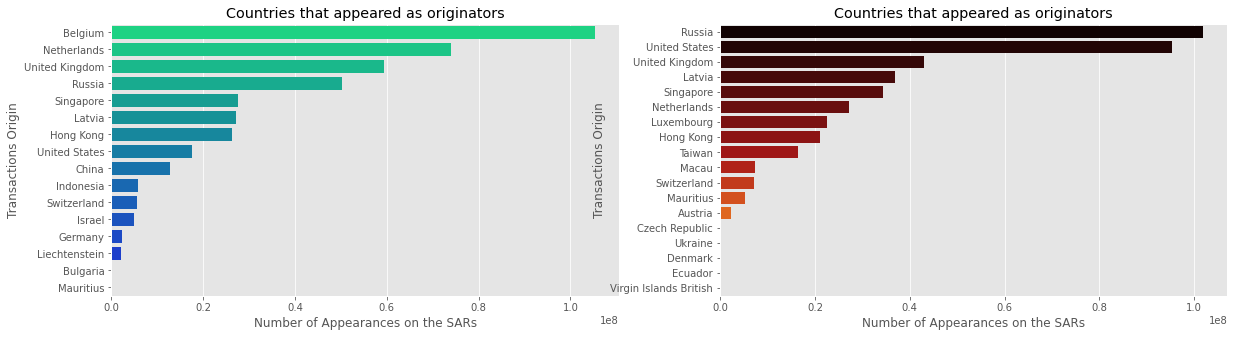

In [174]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 5))
top_originator.sort_values(['total_sum'], ascending=False, inplace=True)
sb.barplot(x="total_sum", y= 'originator_bank_country', data=top_originator, ax=ax1, palette = 'winter_r');
top_beneficiary.sort_values(['total_sum'], ascending=False, inplace=True)
sb.barplot(x="total_sum", y= 'beneficiary_bank_country', data=top_beneficiary, ax=ax2, palette = 'gist_heat');

ax1.set(xlabel='Number of Appearances on the SARs', ylabel='Transactions Origin');
ax1.set_title('Countries that appeared as originators')

ax2.set(xlabel='Number of Appearances on the SARs', ylabel='Transactions Origin');
ax2.set_title('Countries that appeared as originators')
plt.show()

### How did my hometown, Singapore, fare?

In [175]:
result = %sql SELECT originator_bank, count(originator_bank) as count FROM transaction_map WHERE originator_bank_country = 'Singapore' GROUP BY originator_bank
singapore = result.DataFrame()
singapore.sort_values(['count'], ascending=False, inplace=True)

 * sqlite:///FinCrime_Files.db
Done.


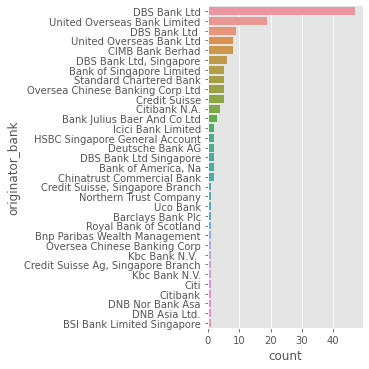

In [176]:
sb.catplot(y="originator_bank", x= 'count', kind="bar", data=singapore);

In [177]:
result = %sql SELECT originator_bank, count(originator_bank) as count FROM transaction_map WHERE originator_bank_country = 'Singapore' GROUP BY originator_bank HAVING count > 10
singapore = result.DataFrame()

 * sqlite:///FinCrime_Files.db
Done.


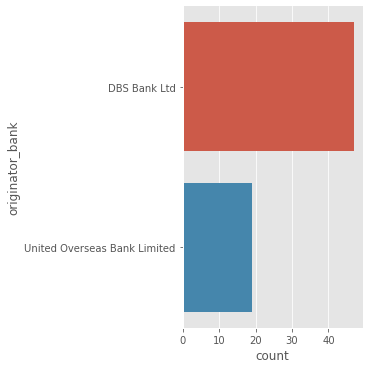

In [178]:
sb.catplot(y="originator_bank", x= 'count', kind="bar", data=singapore);

# __References:__

1. https://www.occrp.org/en/the-fincen-files/  
2. https://www.acfcs.org/leak-of-thousands-of-fincen-sars-reveals-large-international-banks-still-struggling-on-aml-serving-illicit-gatekeepers-corrupt-powerbrokers-terror-groups-icij-report/  
3. https://www.icij.org/investigations/fincen-files/explore-the-fincen-files-data/  
4. http://www.oecd.org/ctp/harmful/theoecdissuesthelistofunco-operativetaxhavens.htm  